In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.stats
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot

In [2]:
os.getcwd()

'/Users/alvastrand/Library/Mobile Documents/com~apple~CloudDocs/Documents/OU/Research/notebooks/PeerJ'

In [3]:
path = '/Users/alvastrand/Downloads/'

os.chdir(path)

In [4]:
os.getcwd()

'/Users/alvastrand/Downloads'

In [5]:
pd.set_option('max_columns', 100)

In [6]:
list_folders = sorted([i for i in os.listdir(path + 'vprs/') if 'vprs' in i])
print(len(list_folders))

print(list_folders)

6
['vprs20210327', 'vprs20210328', 'vprs20210329', 'vprs20210330', 'vprs20210425', 'vprs20210526']


In [7]:
list_files_w = sorted([i for i in os.listdir(path + 'wind_profiles/') if '.csv' in i])
print(len(list_files_w))

print(list_files_w)

30
['windprofile_20210327_00UTC_35.18N_97.44W.csv', 'windprofile_20210327_03UTC_35.18N_97.44W.csv', 'windprofile_20210327_06UTC_35.18N_97.44W.csv', 'windprofile_20210327_09UTC_35.18N_97.44W.csv', 'windprofile_20210327_12UTC_35.18N_97.44W.csv', 'windprofile_20210328_00UTC_35.18N_97.44W.csv', 'windprofile_20210328_03UTC_35.18N_97.44W.csv', 'windprofile_20210328_06UTC_35.18N_97.44W.csv', 'windprofile_20210328_09UTC_35.18N_97.44W.csv', 'windprofile_20210328_12UTC_35.18N_97.44W.csv', 'windprofile_20210329_00UTC_35.18N_97.44W.csv', 'windprofile_20210329_03UTC_35.18N_97.44W.csv', 'windprofile_20210329_06UTC_35.18N_97.44W.csv', 'windprofile_20210329_09UTC_35.18N_97.44W.csv', 'windprofile_20210329_12UTC_35.18N_97.44W.csv', 'windprofile_20210330_00UTC_35.18N_97.44W.csv', 'windprofile_20210330_03UTC_35.18N_97.44W.csv', 'windprofile_20210330_06UTC_35.18N_97.44W.csv', 'windprofile_20210330_09UTC_35.18N_97.44W.csv', 'windprofile_20210330_12UTC_35.18N_97.44W.csv', 'windprofile_20210425_00UTC_35.18N_9

In [8]:
list_hours = list(range(0, 15, 3))
print(len(list_hours))

print(list_hours)

5
[0, 3, 6, 9, 12]


In [9]:
list_all_dates = []
list_all_times = []
list_sum_Z = []
list_sum_eta = []
list_mean_wind_speed = []
list_mean_wind_direction = []

for folder_index in range(len(list_folders)):
    
    path_to_file = 'vprs/' + list_folders[folder_index] + '/csv_vpr/'

    list_files = sorted([i for i in os.listdir(path + 'vprs/' + list_folders[folder_index] + '/csv_vpr/')])
    print(len(list_files))

#     print(list_files)

    # set(i[13:15] for i in list_files)

    for file_index in range(len(list_files)):
        
        filename = list_files[file_index]
        
        print(path_to_file + filename)
        
        filename_date = filename[4:12]
#         print(filename_date)

        filename_time = filename[13:19]
#         print(filename_time)

        filename_time_hours = int(filename_time[0:2])
#         print(filename_time_hours)

        filename_time_minutes = int(filename_time[2:4])
#         print(filename_time_minutes)

        filename_time_seconds = int(filename_time[4:6])
#         print(filename_time_seconds)

        filename_time_minutes_converted = filename_time_minutes/60
#         print(filename_time_minutes_converted)

        filename_time_seconds_converted = filename_time_seconds/60/60
#         print(filename_time_seconds_converted)

        filename_time_converted = filename_time_hours + filename_time_minutes_converted + \
        filename_time_seconds_converted
#         print(filename_time_converted)
        
        list_all_dates.append(filename_date)
        
        list_all_times.append(filename_time)

        df = pd.read_csv(path_to_file + filename, names=['geopotential_height', 'Z', 'eta'])
        print(len(df))

        # above mean sea level (meters)
        # reflectivity factor (dBZ)
        # reflectivity (cm^2/km^3)

        df = df[(df['geopotential_height'] <= 1250) & (df['geopotential_height'] >= 450)]
        print(len(df))

        print(df.head(2))

        # df.plot('Z', 'geopotential_height', kind='scatter')

        # plt.show()

        path_to_file_w = 'wind_profiles/'

        list_files_date = [i for i in list_files_w if i[12:20] == filename_date]
        print(len(list_files_date))

#         print(list_files_date)

        list_differences = [abs(i - filename_time_converted) for i in list_hours]
#         print(list_differences)

        index_smallest = list_differences.index(min(list_differences))
#         print(index_smallest)

        filename_w = list_files_date[index_smallest]
    
        print(path_to_file_w + filename_w)

        df_w = pd.read_csv(path_to_file_w + filename_w, names=['geopotential_height', 'wind_speed', 'wind_direction'])
        print(len(df_w))

        # above mean sea level (meters)
        # (meters/second)
        # direction the wind is blowing toward (degrees clockwise from north)

        df_w = df_w[(df_w['geopotential_height'] <= 1250) & (df_w['geopotential_height'] >= 450)]
        print(len(df_w))

        df_w = df_w[df_w['wind_speed'] > 0]
        print(len(df_w))

        print(df_w.head(2))

        # df_w.plot('wind_speed', 'geopotential_height', kind='scatter')

        # plt.show()

        # df_w.plot('wind_direction', 'geopotential_height', kind='scatter')

        # plt.show()
        
#         list_sum_Z.append(df['Z'].sum(axis=0))
        
        list_sum_eta.append(df['eta'].sum(axis=0)/10)
        
        list_mean_wind_speed.append(df_w['wind_speed'].mean(axis=0))
        
        list_mean_wind_direction.append(df_w['wind_direction'].mean(axis=0))

88
vprs/vprs20210327/csv_vpr/vpr_20210327_000458UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  13.379388  619.685165
5                550.0   6.839452  137.460365
5
wind_profiles/windprofile_20210327_00UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           503.541077    4.301294      357.512390
3           733.497559    5.139190      359.189453
vprs/vprs20210327/csv_vpr/vpr_20210327_001434UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  13.615954  654.376610
5                550.0   7.374741  155.491434
5
wind_profiles/windprofile_20210327_00UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           503.541077    4.301294      357.512390
3           733.497559    5.139190      359.189453
vprs/vprs20210327/csv_vpr/vpr_20210327_002410UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  14.559656  813.20113

5                550.0  9.207127  237.107345
5
wind_profiles/windprofile_20210327_06UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           528.943848    5.243926      331.432312
3           758.460205    6.396736      354.499268
vprs/vprs20210327/csv_vpr/vpr_20210327_045428UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  7.114304  146.441020
5                550.0  9.173875  235.298857
5
wind_profiles/windprofile_20210327_06UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           528.943848    5.243926      331.432312
3           758.460205    6.396736      354.499268
vprs/vprs20210327/csv_vpr/vpr_20210327_050402UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  8.196175  187.866729
5                550.0  8.992273  225.662636
5
wind_profiles/windprofile_20210327_06UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_directio

59
9
   geopotential_height         Z         eta
4                450.0  8.561633  204.359866
5                550.0  9.931797  280.163819
5
wind_profiles/windprofile_20210327_09UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           517.050659    3.526151        3.911152
3           746.399658    6.502614        7.576012
vprs/vprs20210327/csv_vpr/vpr_20210327_080607UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  8.299400  192.385466
5                550.0  9.832496  273.830548
5
wind_profiles/windprofile_20210327_09UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           517.050659    3.526151        3.911152
3           746.399658    6.502614        7.576012
vprs/vprs20210327/csv_vpr/vpr_20210327_081542UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  8.145035  185.667482
5                550.0  9.957860  281.850176
5
wind_profiles/windpr

59
9
   geopotential_height          Z         eta
4                450.0  11.228929  377.681034
5                550.0  10.648373  330.422589
5
wind_profiles/windprofile_20210327_09UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           517.050659    3.526151        3.911152
3           746.399658    6.502614        7.576012
vprs/vprs20210327/csv_vpr/vpr_20210327_094059UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  11.563094  407.888647
5                550.0  10.936372  353.077118
5
wind_profiles/windprofile_20210327_09UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           517.050659    3.526151        3.911152
3           746.399658    6.502614        7.576012
vprs/vprs20210327/csv_vpr/vpr_20210327_094434UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  11.241159  378.746176
5                550.0  11.170549  372.638130
5
wind_profil

59
9
   geopotential_height          Z         eta
4                450.0  12.212319  473.657249
5                550.0   9.450898  250.796814
5
wind_profiles/windprofile_20210328_00UTC_35.18N_97.44W.csv
29
4
0
Empty DataFrame
Columns: [geopotential_height, wind_speed, wind_direction]
Index: []
vprs/vprs20210328/csv_vpr/vpr_20210328_001710UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  11.839803  434.723037
5                550.0   8.869972  219.396383
5
wind_profiles/windprofile_20210328_00UTC_35.18N_97.44W.csv
29
4
0
Empty DataFrame
Columns: [geopotential_height, wind_speed, wind_direction]
Index: []
vprs/vprs20210328/csv_vpr/vpr_20210328_002039UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  11.465445  398.819916
5                550.0   9.796175  271.550045
5
wind_profiles/windprofile_20210328_00UTC_35.18N_97.44W.csv
29
4
0
Empty DataFrame
Columns: [geopotential_height, wind_speed, wind_direction]
Index:

59
9
   geopotential_height         Z         eta
4                450.0  9.532151  255.533239
5                550.0  3.459458   63.121618
5
wind_profiles/windprofile_20210328_03UTC_35.18N_97.44W.csv
29
3
0
Empty DataFrame
Columns: [geopotential_height, wind_speed, wind_direction]
Index: []
vprs/vprs20210328/csv_vpr/vpr_20210328_020320UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  9.534821  255.690386
5                550.0  2.602116   51.813615
5
wind_profiles/windprofile_20210328_03UTC_35.18N_97.44W.csv
29
3
0
Empty DataFrame
Columns: [geopotential_height, wind_speed, wind_direction]
Index: []
vprs/vprs20210328/csv_vpr/vpr_20210328_020649UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  9.135617  233.235197
5                550.0  2.565601   51.379796
5
wind_profiles/windprofile_20210328_03UTC_35.18N_97.44W.csv
29
3
0
Empty DataFrame
Columns: [geopotential_height, wind_speed, wind_direction]
Index: []
vprs/

29
3
0
Empty DataFrame
Columns: [geopotential_height, wind_speed, wind_direction]
Index: []
vprs/vprs20210328/csv_vpr/vpr_20210328_044953UTC_KTLX.csv
59
9
   geopotential_height         Z        eta
4                450.0  5.008287  90.169786
5                550.0  2.295196  48.278289
5
wind_profiles/windprofile_20210328_06UTC_35.18N_97.44W.csv
29
3
0
Empty DataFrame
Columns: [geopotential_height, wind_speed, wind_direction]
Index: []
vprs/vprs20210328/csv_vpr/vpr_20210328_045928UTC_KTLX.csv
59
9
   geopotential_height         Z        eta
4                450.0  5.342185  97.375767
5                550.0  0.269512  30.281923
5
wind_profiles/windprofile_20210328_06UTC_35.18N_97.44W.csv
29
3
0
Empty DataFrame
Columns: [geopotential_height, wind_speed, wind_direction]
Index: []
vprs/vprs20210328/csv_vpr/vpr_20210328_050903UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  5.480211  100.520209
5                550.0  1.948109   44.570056
5
wind_profile

5                550.0 -2.573094  15.737033
5
wind_profiles/windprofile_20210328_12UTC_35.18N_97.44W.csv
29
3
1
   geopotential_height  wind_speed  wind_direction
2           634.151062     2.57985      209.742172
vprs/vprs20210328/csv_vpr/vpr_20210328_104430UTC_KTLX.csv
59
9
   geopotential_height         Z        eta
4                450.0  3.281196  60.583165
5                550.0 -1.228894  21.445834
5
wind_profiles/windprofile_20210328_12UTC_35.18N_97.44W.csv
29
3
1
   geopotential_height  wind_speed  wind_direction
2           634.151062     2.57985      209.742172
vprs/vprs20210328/csv_vpr/vpr_20210328_105406UTC_KTLX.csv
59
9
   geopotential_height        Z        eta
4                450.0  2.80732  54.320578
5                550.0 -1.94907  18.168762
5
wind_profiles/windprofile_20210328_12UTC_35.18N_97.44W.csv
29
3
1
   geopotential_height  wind_speed  wind_direction
2           634.151062     2.57985      209.742172
vprs/vprs20210328/csv_vpr/vpr_20210328_110341UTC_KTLX.csv
5

3           846.654053    5.165347       24.650051
vprs/vprs20210329/csv_vpr/vpr_20210329_040432UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  5.665371  104.898509
5                550.0  6.248934  119.984674
5
wind_profiles/windprofile_20210329_03UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           621.759827    4.466284       16.565634
3           846.654053    5.165347       24.650051
vprs/vprs20210329/csv_vpr/vpr_20210329_041406UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  5.754175  107.065563
5                550.0  5.869092  109.936407
5
wind_profiles/windprofile_20210329_03UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           621.759827    4.466284       16.565634
3           846.654053    5.165347       24.650051
vprs/vprs20210329/csv_vpr/vpr_20210329_042342UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4  

3
   geopotential_height  wind_speed  wind_direction
2           615.127563    5.037695        5.806774
3           840.176270    5.513830       14.097005
vprs/vprs20210329/csv_vpr/vpr_20210329_071614UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  5.963041  112.340510
5                550.0  6.136726  116.924336
5
wind_profiles/windprofile_20210329_06UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           615.127563    5.037695        5.806774
3           840.176270    5.513830       14.097005
vprs/vprs20210329/csv_vpr/vpr_20210329_072549UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  6.334696  122.377585
5                550.0  5.354278   97.647275
5
wind_profiles/windprofile_20210329_06UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           615.127563    5.037695        5.806774
3           840.176270    5.513830       14.097005
vprs/vp

59
9
   geopotential_height          Z         eta
4                450.0  10.956535  354.720192
5                550.0   6.212755  118.989299
5
wind_profiles/windprofile_20210330_00UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           511.333496    4.823455        5.426140
3           740.255127    6.134830        5.948731
vprs/vprs20210330/csv_vpr/vpr_20210330_001449UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  10.974880  356.221677
5                550.0   6.555821  128.769928
5
wind_profiles/windprofile_20210330_00UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           511.333496    4.823455        5.426140
3           740.255127    6.134830        5.948731
vprs/vprs20210330/csv_vpr/vpr_20210330_002424UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  10.002333  284.751150
5                550.0   5.242927   95.175474
5
wind_profil

3           736.115479    7.489191        2.939464
vprs/vprs20210330/csv_vpr/vpr_20210330_034538UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  6.944483  140.825282
5                550.0  5.691705  105.536522
5
wind_profiles/windprofile_20210330_03UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           509.311157    5.414252      358.356659
3           736.115479    7.489191        2.939464
vprs/vprs20210330/csv_vpr/vpr_20210330_035721UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  7.311189  153.232601
5                550.0  5.891516  110.505522
5
wind_profiles/windprofile_20210330_03UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           509.311157    5.414252      358.356659
3           736.115479    7.489191        2.939464
vprs/vprs20210330/csv_vpr/vpr_20210330_040656UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4  

59
9
   geopotential_height          Z         eta
4                450.0  10.129188  293.191346
5                550.0  10.357909  309.046064
5
wind_profiles/windprofile_20210330_09UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           490.688782    4.222943      359.269531
3           715.422852    7.239718        8.903588
vprs/vprs20210330/csv_vpr/vpr_20210330_081602UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  10.098195  291.106475
5                550.0  10.410606  312.818841
5
wind_profiles/windprofile_20210330_09UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           490.688782    4.222943      359.269531
3           715.422852    7.239718        8.903588
vprs/vprs20210330/csv_vpr/vpr_20210330_082537UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  10.021535  286.013080
5                550.0  10.514193  320.369803
5
wind_profil

59
9
   geopotential_height         Z         eta
4                450.0  7.802474  171.585194
5                550.0  6.707701  133.352894
5
wind_profiles/windprofile_20210330_12UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           494.492798    5.361542       27.428429
3           717.573486   10.049344       22.335209
vprs/vprs20210330/csv_vpr/vpr_20210330_114649UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  7.985792  178.982868
5                550.0  5.058911   91.226998
5
wind_profiles/windprofile_20210330_12UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           494.492798    5.361542       27.428429
3           717.573486   10.049344       22.335209
vprs/vprs20210330/csv_vpr/vpr_20210330_115624UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  8.235654  189.582268
5                550.0  0.576462   32.499636
5
wind_profiles/windpr

3           781.816895    3.052481      306.100616
vprs/vprs20210425/csv_vpr/vpr_20210425_033602UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  13.089216  579.634134
5                550.0  14.081948  728.495776
5
wind_profiles/windprofile_20210425_03UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           555.395508    3.467320      294.826782
3           781.816895    3.052481      306.100616
vprs/vprs20210425/csv_vpr/vpr_20210425_034537UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  12.976471  564.780228
5                550.0  14.160025  741.711145
5
wind_profiles/windprofile_20210425_03UTC_35.18N_97.44W.csv
29
4
4
   geopotential_height  wind_speed  wind_direction
2           555.395508    3.467320      294.826782
3           781.816895    3.052481      306.100616
vprs/vprs20210425/csv_vpr/vpr_20210425_035512UTC_KTLX.csv
59
9
   geopotential_height          Z         

3
   geopotential_height  wind_speed  wind_direction
2           571.925049    7.237227      310.006348
3           798.733154    6.652387      314.685913
vprs/vprs20210425/csv_vpr/vpr_20210425_065909UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  13.831732  687.710300
5                550.0  14.221137  752.221976
5
wind_profiles/windprofile_20210425_06UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           571.925049    7.237227      310.006348
3           798.733154    6.652387      314.685913
vprs/vprs20210425/csv_vpr/vpr_20210425_070843UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  13.964633  709.080676
5                550.0  14.348451  774.599764
5
wind_profiles/windprofile_20210425_06UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           571.925049    7.237227      310.006348
3           798.733154    6.652387      314.685913
v

5                550.0  14.541556  809.818813
5
wind_profiles/windprofile_20210425_09UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           564.327881    6.883726      331.380096
3           791.247070    6.915935      332.436157
vprs/vprs20210425/csv_vpr/vpr_20210425_101052UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  14.661044  832.409008
5                550.0  14.270360  760.796273
5
wind_profiles/windprofile_20210425_09UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           564.327881    6.883726      331.380096
3           791.247070    6.915935      332.436157
vprs/vprs20210425/csv_vpr/vpr_20210425_102028UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  15.164036  934.621843
5                550.0  13.970141  709.980466
5
wind_profiles/windprofile_20210425_09UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_d

59
9
   geopotential_height          Z         eta
4                450.0  12.541572  510.963011
5                550.0   8.722112  212.052543
5
wind_profiles/windprofile_20210526_00UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           570.485352    3.764643      319.194977
3           804.161621    3.905353      321.536835
vprs/vprs20210526/csv_vpr/vpr_20210526_012131UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  12.862328  550.129810
5                550.0   8.172457  186.843533
5
wind_profiles/windprofile_20210526_00UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           570.485352    3.764643      319.194977
3           804.161621    3.905353      321.536835
vprs/vprs20210526/csv_vpr/vpr_20210526_012606UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  12.858982  549.706131
5                550.0   8.219885  188.895116
5
wind_profil

3           816.105957    6.256140      338.811737
vprs/vprs20210526/csv_vpr/vpr_20210526_030623UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  12.486049  504.472138
5                550.0  11.751683  425.991213
5
wind_profiles/windprofile_20210526_03UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           584.188232    6.475486      336.282501
3           816.105957    6.256140      338.811737
vprs/vprs20210526/csv_vpr/vpr_20210526_030959UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  12.473954  503.069182
5                550.0  11.877643  438.527279
5
wind_profiles/windprofile_20210526_03UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           584.188232    6.475486      336.282501
3           816.105957    6.256140      338.811737
vprs/vprs20210526/csv_vpr/vpr_20210526_031335UTC_KTLX.csv
59
9
   geopotential_height          Z         

3           816.105957    6.256140      338.811737
vprs/vprs20210526/csv_vpr/vpr_20210526_041803UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  12.472991  502.957559
5                550.0  11.880082  438.773599
5
wind_profiles/windprofile_20210526_03UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           584.188232    6.475486      336.282501
3           816.105957    6.256140      338.811737
vprs/vprs20210526/csv_vpr/vpr_20210526_042139UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  12.360264  490.070710
5                550.0  11.774278  428.213235
5
wind_profiles/windprofile_20210526_03UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           584.188232    6.475486      336.282501
3           816.105957    6.256140      338.811737
vprs/vprs20210526/csv_vpr/vpr_20210526_042516UTC_KTLX.csv
59
9
   geopotential_height          Z         

29
3
3
   geopotential_height  wind_speed  wind_direction
2           594.098877    4.851018        6.155469
3           826.571777    5.620647       11.241467
vprs/vprs20210526/csv_vpr/vpr_20210526_052830UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  12.382131  492.544432
5                550.0  11.978006  448.779393
5
wind_profiles/windprofile_20210526_06UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           594.098877    4.851018        6.155469
3           826.571777    5.620647       11.241467
vprs/vprs20210526/csv_vpr/vpr_20210526_053149UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  12.091618  460.674413
5                550.0  11.832528  433.995330
5
wind_profiles/windprofile_20210526_06UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           594.098877    4.851018        6.155469
3           826.571777    5.620647       11.241

29
3
3
   geopotential_height  wind_speed  wind_direction
2           594.098877    4.851018        6.155469
3           826.571777    5.620647       11.241467
vprs/vprs20210526/csv_vpr/vpr_20210526_071121UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  11.137344  369.799844
5                550.0   9.910448  278.789911
5
wind_profiles/windprofile_20210526_06UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           594.098877    4.851018        6.155469
3           826.571777    5.620647       11.241467
vprs/vprs20210526/csv_vpr/vpr_20210526_071435UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  11.122376  368.527473
5                550.0   9.617616  260.611713
5
wind_profiles/windprofile_20210526_06UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           594.098877    4.851018        6.155469
3           826.571777    5.620647       11.241

5                550.0   9.562908  257.349385
5
wind_profiles/windprofile_20210526_09UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           586.652100    5.976166       24.646540
3           819.096436    8.906633       34.968838
vprs/vprs20210526/csv_vpr/vpr_20210526_081809UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  10.568372  324.391528
5                550.0   9.589285  258.917163
5
wind_profiles/windprofile_20210526_09UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           586.652100    5.976166       24.646540
3           819.096436    8.906633       34.968838
vprs/vprs20210526/csv_vpr/vpr_20210526_082127UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  10.212355  298.859917
5                550.0   9.640015  261.959355
5
wind_profiles/windprofile_20210526_09UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_d

5                550.0   8.042827  181.348960
5
wind_profiles/windprofile_20210526_09UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           586.652100    5.976166       24.646540
3           819.096436    8.906633       34.968838
vprs/vprs20210526/csv_vpr/vpr_20210526_092600UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  10.058374  288.449494
5                550.0   8.071850  182.564908
5
wind_profiles/windprofile_20210526_09UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           586.652100    5.976166       24.646540
3           819.096436    8.906633       34.968838
vprs/vprs20210526/csv_vpr/vpr_20210526_092929UTC_KTLX.csv
59
9
   geopotential_height          Z         eta
4                450.0  10.267149  302.654590
5                550.0   7.856317  173.725672
5
wind_profiles/windprofile_20210526_09UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_d

5                550.0  1.122057  36.850044
5
wind_profiles/windprofile_20210526_12UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           595.231934    3.190941        8.868199
3           827.497559    5.113867       52.083988
vprs/vprs20210526/csv_vpr/vpr_20210526_113649UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  7.414575  156.924173
5                550.0  1.066475   36.381439
5
wind_profiles/windprofile_20210526_12UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction
2           595.231934    3.190941        8.868199
3           827.497559    5.113867       52.083988
vprs/vprs20210526/csv_vpr/vpr_20210526_114624UTC_KTLX.csv
59
9
   geopotential_height         Z         eta
4                450.0  7.531743  161.215415
5                550.0  0.774828   34.018498
5
wind_profiles/windprofile_20210526_12UTC_35.18N_97.44W.csv
29
3
3
   geopotential_height  wind_speed  wind_direction

In [10]:
df_all = pd.DataFrame(data={'date': list_all_dates, 'time': list_all_times, 
                            'sum_of_eta': list_sum_eta, 'mean_wind_speed': list_mean_wind_speed, 
                            'mean_wind_direction': list_mean_wind_direction})
print(df_all.shape)

df_all.head(2)

(600, 5)


date    time  sum_of_eta  mean_wind_speed  mean_wind_direction
0  20210327  000458   96.245742         5.103788            181.45099
1  20210327  001434  102.304289         5.103788            181.45099

In [11]:
df_all_sum_of_eta = df_all[['date', 'sum_of_eta']].groupby(['date']).sum()

df_all_sum_of_eta = df_all_sum_of_eta.reset_index()

print(df_all_sum_of_eta.shape)

df_all_sum_of_eta

(6, 2)


date    sum_of_eta
0  20210327  17983.304201
1  20210328   3882.663501
2  20210329   3411.572205
3  20210330   9357.458624
4  20210425  27443.680754
5  20210526  42798.092193

In [12]:
df_all[df_all['mean_wind_speed'] < 1]

date    time  sum_of_eta  mean_wind_speed  mean_wind_direction
355  20210425  000516  871.116914         0.244471           229.433563
356  20210425  001451  837.100157         0.244471           229.433563
357  20210425  002425  854.464320         0.244471           229.433563
358  20210425  003400  708.373698         0.244471           229.433563
359  20210425  004335  440.879997         0.244471           229.433563
360  20210425  005309  279.052031         0.244471           229.433563
361  20210425  010244  192.621083         0.244471           229.433563
362  20210425  011219  116.122060         0.244471           229.433563
363  20210425  012154   61.195255         0.244471           229.433563

In [13]:
df_all = df_all.dropna(subset=['mean_wind_speed'])
print(len(df_all))

492


In [14]:
sorted(df_all['mean_wind_speed'].unique())

[0.2444714605808258,
 1.637691895167033,
 2.579850435256958,
 2.8596293330192566,
 3.893770694732666,
 4.458998203277588,
 5.103787899017334,
 5.192956765492757,
 5.494330406188965,
 5.542444070180257,
 5.660233497619629,
 5.6956400871276855,
 5.9883049329121905,
 6.158851146697998,
 6.325281977653503,
 6.442067623138428,
 6.463170210520427,
 6.957543075084686,
 8.133653163909912,
 8.374328255653381,
 8.497021834055582,
 8.915222883224487,
 9.851682424545288,
 10.371143579483032,
 11.504145622253418,
 11.747793197631836]

In [15]:
sorted(df_all['mean_wind_direction'].unique())

[7.982284188270568,
 13.542842864990234,
 13.934544801712036,
 14.447250962257385,
 15.131118297576904,
 24.23280652364095,
 25.130089441935223,
 31.49457550048828,
 33.95177777608236,
 34.994462966918945,
 35.94317499796549,
 39.58657169342041,
 42.69509665171305,
 97.09245419502258,
 104.68808579444885,
 175.88008069992065,
 179.5215429216623,
 181.45098966360092,
 209.7421722412109,
 229.43356323242188,
 263.01514053344727,
 315.56797281901044,
 316.97264099121094,
 320.7643737792969,
 334.48252360026044,
 340.2341715494792]

In [16]:
list(df_all['mean_wind_direction'])

[181.45098966360092,
 181.45098966360092,
 181.45098966360092,
 181.45098966360092,
 181.45098966360092,
 181.45098966360092,
 181.45098966360092,
 181.45098966360092,
 181.45098966360092,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 263.01514053344727,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 175.88008069992065,
 14.447250962

In [17]:
list(df_all['mean_wind_speed'])

[5.103787899017334,
 5.103787899017334,
 5.103787899017334,
 5.103787899017334,
 5.103787899017334,
 5.103787899017334,
 5.103787899017334,
 5.103787899017334,
 5.103787899017334,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 5.660233497619629,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.158851146697998,
 6.957543075084686,
 6.957543075084686,
 6.957543075084686,


In [18]:
list(df_all['mean_wind_direction'].unique())

[181.45098966360092,
 263.01514053344727,
 175.88008069992065,
 14.447250962257385,
 39.58657169342041,
 209.7421722412109,
 35.94317499796549,
 24.23280652364095,
 15.131118297576904,
 25.130089441935223,
 33.95177777608236,
 7.982284188270568,
 97.09245419502258,
 13.934544801712036,
 104.68808579444885,
 31.49457550048828,
 229.43356323242188,
 316.97264099121094,
 315.56797281901044,
 334.48252360026044,
 179.5215429216623,
 320.7643737792969,
 340.2341715494792,
 13.542842864990234,
 34.994462966918945,
 42.69509665171305]

In [19]:
list(df_all['mean_wind_speed'].unique())

[5.103787899017334,
 5.660233497619629,
 6.158851146697998,
 6.957543075084686,
 10.371143579483032,
 2.579850435256958,
 1.637691895167033,
 5.192956765492757,
 5.6956400871276855,
 8.497021834055582,
 11.747793197631836,
 6.325281977653503,
 8.374328255653381,
 9.851682424545288,
 8.915222883224487,
 11.504145622253418,
 0.2444714605808258,
 2.8596293330192566,
 6.442067623138428,
 6.463170210520427,
 5.494330406188965,
 3.893770694732666,
 5.9883049329121905,
 5.542444070180257,
 8.133653163909912,
 4.458998203277588]

In [20]:
len(list(df_all['mean_wind_direction'].unique()))

26

In [21]:
len(list(df_all['mean_wind_speed'].unique()))

26

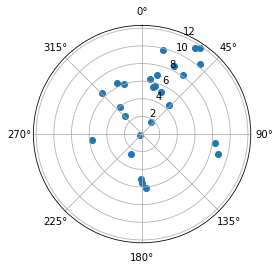

In [22]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.scatter([math.radians(i) for i in df_all['mean_wind_direction'].unique()], df_all['mean_wind_speed'].unique())

ax.set_theta_direction(-1)

ax.set_theta_zero_location("N")

plt.show()

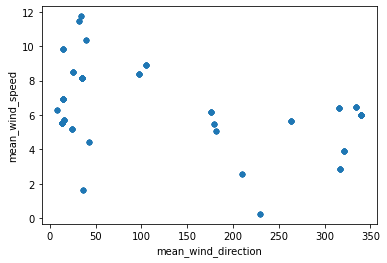

In [23]:
df_all.plot.scatter('mean_wind_direction', 'mean_wind_speed')

plt.show()

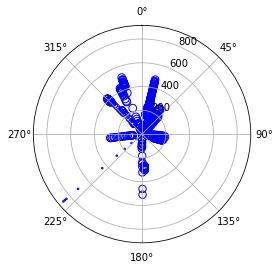

In [24]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.scatter([math.radians(i) for i in df_all['mean_wind_direction']], df_all['sum_of_eta'], 
           s=df_all['mean_wind_speed']*10, facecolors='none', edgecolors='b')

ax.set_theta_direction(-1)

ax.set_theta_zero_location("N")

plt.show()

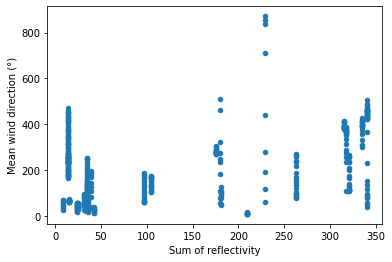

In [25]:
df_all.plot.scatter('mean_wind_direction', 'sum_of_eta')

plt.xlabel('Sum of reflectivity')

plt.ylabel('Mean wind direction (°)')

plt.show()

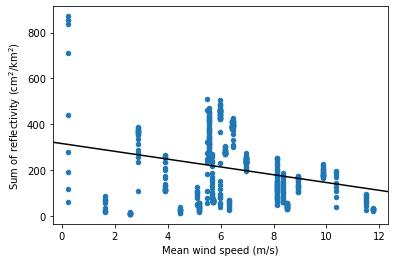

In [26]:
first_plot = df_all.plot.scatter('mean_wind_speed', 'sum_of_eta')

model_ols = smf.ols(formula='sum_of_eta ~ mean_wind_speed', data=df_all)

res_ols = model_ols.fit()

abline_plot(model_results=res_ols, ax=first_plot, color='black')

plt.xlabel('Mean wind speed (m/s)')

plt.ylabel('Sum of reflectivity ($\mathrm{cm^2}$/$\mathrm{km^2}$)')

plt.show()

In [27]:
scipy.stats.pearsonr(df_all['mean_wind_speed'], df_all['sum_of_eta'])

(-0.25939017382420704, 5.246654714475527e-09)

In [28]:
# plt.scatter(df_all['mean_wind_direction'], df_all['sum_of_eta'], s=df_all['mean_wind_speed']*50, facecolors='none', 
#             edgecolors='b')

# plt.xlabel('Mean wind direction')

# plt.ylabel('Sum of reflectivity')

# plt.show()

In [29]:
df_all_added_cols = df_all.copy()
print(len(df_all_added_cols))

df_all_added_cols.head(2)

492


date    time  sum_of_eta  mean_wind_speed  mean_wind_direction
0  20210327  000458   96.245742         5.103788            181.45099
1  20210327  001434  102.304289         5.103788            181.45099

In [30]:
df_all_added_cols['hours'] = df_all_added_cols['time'].str[0:2].astype(int)

df_all_added_cols['minutes'] = df_all_added_cols['time'].str[2:4].astype(int)

df_all_added_cols['seconds'] = df_all_added_cols['time'].str[4:6].astype(int)

df_all_added_cols['minutes_converted'] = df_all_added_cols['minutes']/60

df_all_added_cols['seconds_converted'] = df_all_added_cols['seconds']/60/60

df_all_added_cols['time_converted'] = df_all_added_cols['hours'] + df_all_added_cols['minutes_converted'] + \
df_all_added_cols['seconds_converted']

print(len(df_all_added_cols))

df_all_added_cols.head(2)

492


date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  000458   96.245742         5.103788            181.45099      0   
1  20210327  001434  102.304289         5.103788            181.45099      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  
0        4       58           0.066667           0.016111        0.082778  
1       14       34           0.233333           0.009444        0.242778

In [31]:
filename = 'allRotTrks.csv'

df_m = pd.read_csv(filename)
print(len(df_m))

df_m.head(2)

6218


trackID              timeUTC               sunSet  \
0  KES120210327011151_1  2021-03-27 01:13:54  2021-03-27 00:47:34   
1  KES120210327011151_2  2021-03-27 01:13:55  2021-03-27 00:47:34   

               sunRise  minAfterSet  minBefRise  locLon  locLat  startFrm  \
0  2021-03-27 12:24:44        26.33      670.83  -97.52   34.98      3682   
1  2021-03-27 12:24:44        26.35      670.82  -97.52   34.98      3734   

   endFrm  noFrames  frmsDet    durSec  moonSpd  scrnAzimuth  avgPixSz  \
0    3687         6        6  0.200000   0.1776   294.183981      5.00   
1    3743        10        8  0.333333   0.0943   273.566873    135.75   

   moonElevation  moonAzimuth  moonDistance  camRotCorr  moonDiamPix  vidDim  \
0          29.70        97.65        365546         0.0          912     970   
1          29.71        97.65        365545         0.0          912     970   

   bearing  maxPix  
0   325.46    15.0  
1     0.48   226.0

In [32]:
df_m['date'] = df_m['timeUTC'].str[0:4] + df_m['timeUTC'].str[5:7] + df_m['timeUTC'].str[8:10]
print(len(df_m))

df_m.head(2)

6218


trackID              timeUTC               sunSet  \
0  KES120210327011151_1  2021-03-27 01:13:54  2021-03-27 00:47:34   
1  KES120210327011151_2  2021-03-27 01:13:55  2021-03-27 00:47:34   

               sunRise  minAfterSet  minBefRise  locLon  locLat  startFrm  \
0  2021-03-27 12:24:44        26.33      670.83  -97.52   34.98      3682   
1  2021-03-27 12:24:44        26.35      670.82  -97.52   34.98      3734   

   endFrm  noFrames  frmsDet    durSec  moonSpd  scrnAzimuth  avgPixSz  \
0    3687         6        6  0.200000   0.1776   294.183981      5.00   
1    3743        10        8  0.333333   0.0943   273.566873    135.75   

   moonElevation  moonAzimuth  moonDistance  camRotCorr  moonDiamPix  vidDim  \
0          29.70        97.65        365546         0.0          912     970   
1          29.71        97.65        365545         0.0          912     970   

   bearing  maxPix      date  
0   325.46    15.0  20210327  
1     0.48   226.0  20210327

In [33]:
df_m['actual_time'] = df_m['timeUTC'].str[11:13] + df_m['timeUTC'].str[14:16] + df_m['timeUTC'].str[17:19]

df_m['actual_hours'] = df_m['actual_time'].str[0:2].astype(int)

df_m['actual_minutes'] = df_m['actual_time'].str[2:4].astype(int)

df_m['actual_seconds'] = df_m['actual_time'].str[4:6].astype(int)

df_m['actual_minutes_converted'] = df_m['actual_minutes']/60

df_m['actual_seconds_converted'] = df_m['actual_seconds']/60/60

df_m['actual_time_converted'] = df_m['actual_hours'] + df_m['actual_minutes_converted'] + \
df_m['actual_seconds_converted']

print(len(df_m))

df_m.head(2)

6218


trackID              timeUTC               sunSet  \
0  KES120210327011151_1  2021-03-27 01:13:54  2021-03-27 00:47:34   
1  KES120210327011151_2  2021-03-27 01:13:55  2021-03-27 00:47:34   

               sunRise  minAfterSet  minBefRise  locLon  locLat  startFrm  \
0  2021-03-27 12:24:44        26.33      670.83  -97.52   34.98      3682   
1  2021-03-27 12:24:44        26.35      670.82  -97.52   34.98      3734   

   endFrm  noFrames  frmsDet    durSec  moonSpd  scrnAzimuth  avgPixSz  \
0    3687         6        6  0.200000   0.1776   294.183981      5.00   
1    3743        10        8  0.333333   0.0943   273.566873    135.75   

   moonElevation  moonAzimuth  moonDistance  camRotCorr  moonDiamPix  vidDim  \
0          29.70        97.65        365546         0.0          912     970   
1          29.71        97.65        365545         0.0          912     970   

   bearing  maxPix      date actual_time  actual_hours  actual_minutes  \
0   325.46    15.0  20210327      011354             1              13   
1     0.48   226.0  20210327      011355             1              13   

   actual_seconds  actual_minutes_converted  actual_seconds_converted  \
0              54                  0.216667                  0.015000   
1              55                  0.216667                  0.015278   

   actual_time_converted  
0               1.231667  
1               1.231944

In [34]:
print(min(df_m['actual_time_converted']))

print(max(df_m['actual_time_converted']))

1.2316666666666667
11.900555555555556


In [35]:
print(len(df_m['date'].unique()))

print(list(df_m['date'].unique()))

29
['20210327', '20210328', '20210329', '20210330', '20210425', '20210526', '20180428', '20180429', '20180430', '20190421', '20190422', '20200506', '20200508', '20210525', '20200306', '20180928', '20190520', '20200308', '20200829', '20200830', '20200831', '20200903', '20200929', '20181022', '20181023', '20181024', '20200904', '20201003', '20201005']


In [36]:
print(len(df_all_added_cols['date'].unique()))

print(list(df_all_added_cols['date'].unique()))

6
['20210327', '20210328', '20210329', '20210330', '20210425', '20210526']


In [37]:
df_m = df_m[df_m['date'].isin(list(df_all_added_cols['date'].unique()))]
print(len(df_m))

2207


In [38]:
cnt = 0

for i in range(len(df_m)):

    df_row_merged = df_m.iloc[[i]].merge(df_all_added_cols, on='date')
    
    df_row_merged['time_difference'] = (df_row_merged['actual_time_converted'] - \
                                        df_row_merged['time_converted']).abs()

    print(len(df_row_merged))
    
#     print(df_row_merged.head(2))

    df_row = df_row_merged.iloc[[df_row_merged['time_difference'].idxmin()]]
    print(len(df_row))

#     print(df_row)

    if cnt == 0:

        df_m_added_cols = df_row

    else:

        df_m_added_cols = pd.concat([df_m_added_cols, df_row])

    print(len(df_m_added_cols))

#     print(df_m_added_cols)

    cnt += 1

88
1
1
88
1
2
88
1
3
88
1
4
88
1
5
88
1
6
88
1
7
88
1
8
88
1
9
88
1
10
88
1
11
88
1
12
88
1
13
88
1
14
88
1
15
88
1
16
88
1
17
88
1
18
88
1
19
88
1
20
88
1
21
88
1
22
88
1
23
88
1
24
88
1
25
88
1
26
88
1
27
88
1
28
88
1
29
88
1
30
88
1
31
88
1
32
88
1
33
88
1
34
88
1
35
88
1
36
88
1
37
88
1
38
88
1
39
88
1
40
88
1
41
88
1
42
88
1
43
88
1
44
88
1
45
88
1
46
88
1
47
88
1
48
88
1
49
88
1
50
88
1
51
88
1
52
88
1
53
88
1
54
88
1
55
88
1
56
88
1
57
88
1
58
88
1
59
88
1
60
88
1
61
88
1
62
88
1
63
88
1
64
88
1
65
88
1
66
88
1
67
88
1
68
88
1
69
88
1
70
88
1
71
88
1
72
88
1
73
88
1
74
88
1
75
88
1
76
88
1
77
88
1
78
88
1
79
88
1
80
88
1
81
88
1
82
88
1
83
88
1
84
88
1
85
88
1
86
88
1
87
88
1
88
88
1
89
88
1
90
88
1
91
88
1
92
88
1
93
88
1
94
88
1
95
88
1
96
88
1
97
88
1
98
88
1
99
88
1
100
88
1
101
88
1
102
88
1
103
88
1
104
88
1
105
88
1
106
88
1
107
88
1
108
88
1
109
88
1
110
88
1
111
88
1
112
88
1
113
88
1
114
88
1
115
88
1
116
88
1
117
88
1
118
88
1
119
88
1
120
88
1
121
88
1
122
88
1
123
8

1
923
88
1
924
88
1
925
88
1
926
88
1
927
88
1
928
88
1
929
88
1
930
88
1
931
88
1
932
88
1
933
88
1
934
88
1
935
88
1
936
88
1
937
88
1
938
88
1
939
88
1
940
88
1
941
88
1
942
88
1
943
88
1
944
88
1
945
88
1
946
88
1
947
88
1
948
88
1
949
88
1
950
88
1
951
88
1
952
88
1
953
88
1
954
88
1
955
88
1
956
88
1
957
88
1
958
88
1
959
88
1
960
88
1
961
88
1
962
88
1
963
88
1
964
88
1
965
88
1
966
88
1
967
88
1
968
88
1
969
88
1
970
88
1
971
88
1
972
88
1
973
88
1
974
88
1
975
88
1
976
88
1
977
88
1
978
88
1
979
88
1
980
88
1
981
88
1
982
88
1
983
88
1
984
88
1
985
88
1
986
88
1
987
88
1
988
88
1
989
88
1
990
88
1
991
88
1
992
88
1
993
88
1
994
88
1
995
88
1
996
88
1
997
88
1
998
88
1
999
88
1
1000
88
1
1001
88
1
1002
88
1
1003
88
1
1004
88
1
1005
88
1
1006
88
1
1007
88
1
1008
88
1
1009
88
1
1010
88
1
1011
88
1
1012
88
1
1013
88
1
1014
88
1
1015
88
1
1016
88
1
1017
88
1
1018
88
1
1019
88
1
1020
88
1
1021
88
1
1022
88
1
1023
88
1
1024
88
1
1025
88
1
1026
88
1
1027
88
1
1028
88
1
1029
88
1
1030


75
1
1751
75
1
1752
75
1
1753
75
1
1754
75
1
1755
75
1
1756
75
1
1757
75
1
1758
75
1
1759
75
1
1760
75
1
1761
75
1
1762
75
1
1763
75
1
1764
75
1
1765
75
1
1766
75
1
1767
75
1
1768
75
1
1769
75
1
1770
75
1
1771
75
1
1772
75
1
1773
75
1
1774
75
1
1775
75
1
1776
75
1
1777
75
1
1778
75
1
1779
75
1
1780
75
1
1781
75
1
1782
75
1
1783
75
1
1784
75
1
1785
75
1
1786
75
1
1787
75
1
1788
75
1
1789
75
1
1790
75
1
1791
75
1
1792
75
1
1793
75
1
1794
75
1
1795
75
1
1796
75
1
1797
75
1
1798
75
1
1799
75
1
1800
75
1
1801
75
1
1802
75
1
1803
75
1
1804
75
1
1805
75
1
1806
75
1
1807
75
1
1808
75
1
1809
75
1
1810
75
1
1811
75
1
1812
75
1
1813
75
1
1814
75
1
1815
75
1
1816
75
1
1817
75
1
1818
75
1
1819
75
1
1820
75
1
1821
75
1
1822
75
1
1823
75
1
1824
75
1
1825
75
1
1826
75
1
1827
75
1
1828
75
1
1829
75
1
1830
75
1
1831
75
1
1832
75
1
1833
75
1
1834
75
1
1835
75
1
1836
75
1
1837
75
1
1838
75
1
1839
75
1
1840
75
1
1841
75
1
1842
75
1
1843
75
1
1844
75
1
1845
75
1
1846
75
1
1847
75
1
1848
75
1
1849
75
1
1850


In [39]:
print(len(df_m_added_cols))

df_m_added_cols.head(2)

2207


trackID              timeUTC               sunSet  \
7  KES120210327011151_1  2021-03-27 01:13:54  2021-03-27 00:47:34   
7  KES120210327011151_2  2021-03-27 01:13:55  2021-03-27 00:47:34   

               sunRise  minAfterSet  minBefRise  locLon  locLat  startFrm  \
7  2021-03-27 12:24:44        26.33      670.83  -97.52   34.98      3682   
7  2021-03-27 12:24:44        26.35      670.82  -97.52   34.98      3734   

   endFrm  noFrames  frmsDet    durSec  moonSpd  scrnAzimuth  avgPixSz  \
7    3687         6        6  0.200000   0.1776   294.183981      5.00   
7    3743        10        8  0.333333   0.0943   273.566873    135.75   

   moonElevation  moonAzimuth  moonDistance  camRotCorr  moonDiamPix  vidDim  \
7          29.70        97.65        365546         0.0          912     970   
7          29.71        97.65        365545         0.0          912     970   

   bearing  maxPix      date actual_time  actual_hours  actual_minutes  \
7   325.46    15.0  20210327      011354             1              13   
7     0.48   226.0  20210327      011355             1              13   

   actual_seconds  actual_minutes_converted  actual_seconds_converted  \
7              54                  0.216667                  0.015000   
7              55                  0.216667                  0.015278   

   actual_time_converted    time  sum_of_eta  mean_wind_speed  \
7               1.231667  011207   79.127213         5.103788   
7               1.231944  011207   79.127213         5.103788   

   mean_wind_direction  hours  minutes  seconds  minutes_converted  \
7            181.45099      1       12        7                0.2   
7            181.45099      1       12        7                0.2   

   seconds_converted  time_converted  time_difference  
7           0.001944        1.201944         0.029722  
7           0.001944        1.201944         0.030000

In [40]:
df_m_added_cols['min_direction'] = df_m_added_cols[['mean_wind_direction', 'bearing']].min(axis=1)

df_m_added_cols['max_direction'] = df_m_added_cols[['mean_wind_direction', 'bearing']].max(axis=1)

df_m_added_cols['difference_directions'] = df_m_added_cols['max_direction'] - df_m_added_cols['min_direction']

df_m_added_cols = df_m_added_cols.reset_index(drop=True)

df_m_added_cols.loc[(df_m_added_cols['min_direction'] < df_m_added_cols['max_direction'] - 180), 
                    'difference_directions'] = 360 - df_m_added_cols['max_direction'] + df_m_added_cols['min_direction']

print(len(df_m_added_cols))

df_m_added_cols.head(2)

2207


trackID              timeUTC               sunSet  \
0  KES120210327011151_1  2021-03-27 01:13:54  2021-03-27 00:47:34   
1  KES120210327011151_2  2021-03-27 01:13:55  2021-03-27 00:47:34   

               sunRise  minAfterSet  minBefRise  locLon  locLat  startFrm  \
0  2021-03-27 12:24:44        26.33      670.83  -97.52   34.98      3682   
1  2021-03-27 12:24:44        26.35      670.82  -97.52   34.98      3734   

   endFrm  noFrames  frmsDet    durSec  moonSpd  scrnAzimuth  avgPixSz  \
0    3687         6        6  0.200000   0.1776   294.183981      5.00   
1    3743        10        8  0.333333   0.0943   273.566873    135.75   

   moonElevation  moonAzimuth  moonDistance  camRotCorr  moonDiamPix  vidDim  \
0          29.70        97.65        365546         0.0          912     970   
1          29.71        97.65        365545         0.0          912     970   

   bearing  maxPix      date actual_time  actual_hours  actual_minutes  \
0   325.46    15.0  20210327      011354             1              13   
1     0.48   226.0  20210327      011355             1              13   

   actual_seconds  actual_minutes_converted  actual_seconds_converted  \
0              54                  0.216667                  0.015000   
1              55                  0.216667                  0.015278   

   actual_time_converted    time  sum_of_eta  mean_wind_speed  \
0               1.231667  011207   79.127213         5.103788   
1               1.231944  011207   79.127213         5.103788   

   mean_wind_direction  hours  minutes  seconds  minutes_converted  \
0            181.45099      1       12        7                0.2   
1            181.45099      1       12        7                0.2   

   seconds_converted  time_converted  time_difference  min_direction  \
0           0.001944        1.201944         0.029722      181.45099   
1           0.001944        1.201944         0.030000        0.48000   

   max_direction  difference_directions  
0      325.46000              144.00901  
1      181.45099              179.02901

In [41]:
df_m_mean_diff = df_m_added_cols[['difference_directions', 'mean_wind_speed']].groupby(['mean_wind_speed']).mean()

df_m_mean_diff = df_m_mean_diff.rename(columns={'difference_directions': 'mean_difference'})

df_m_mean_diff = df_m_mean_diff.reset_index()

print(df_m_mean_diff.shape)

df_m_mean_diff

(17, 2)


mean_wind_speed  mean_difference
0          1.637692        48.183175
1          2.579850        52.005303
2          2.859629        33.314345
3          5.103788       162.044654
4          5.192957        35.915021
5          5.542444        24.526716
6          5.660233        85.328170
7          5.695640        13.629313
8          5.988305        36.750552
9          6.158851       169.845367
10         6.463170        18.265295
11         6.957543        22.540194
12         8.374328        78.855984
13         8.497022        11.598745
14         8.915223        95.950393
15         9.851682        12.612187
16        11.747793        31.081600

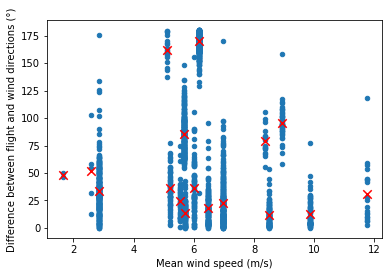

In [42]:
first_plot = df_m_added_cols.plot.scatter('mean_wind_speed', 'difference_directions')

df_m_mean_diff.plot.scatter('mean_wind_speed', 'mean_difference', marker='x', s=72, color='red', ax=first_plot)

plt.xlabel('Mean wind speed (m/s)')

plt.ylabel('Difference between flight and wind directions (°)')

plt.show()

In [43]:
# matplotlib.rcParams

In [44]:
df_m_added_cols_north = df_m_added_cols[(df_m_added_cols['mean_wind_direction'] >= 90) & 
                                        (df_m_added_cols['mean_wind_direction'] < 270)]
print(df_m_added_cols_north.shape)

df_m_added_cols_north.head(2)

(884, 46)


trackID              timeUTC               sunSet  \
0  KES120210327011151_1  2021-03-27 01:13:54  2021-03-27 00:47:34   
1  KES120210327011151_2  2021-03-27 01:13:55  2021-03-27 00:47:34   

               sunRise  minAfterSet  minBefRise  locLon  locLat  startFrm  \
0  2021-03-27 12:24:44        26.33      670.83  -97.52   34.98      3682   
1  2021-03-27 12:24:44        26.35      670.82  -97.52   34.98      3734   

   endFrm  noFrames  frmsDet    durSec  moonSpd  scrnAzimuth  avgPixSz  \
0    3687         6        6  0.200000   0.1776   294.183981      5.00   
1    3743        10        8  0.333333   0.0943   273.566873    135.75   

   moonElevation  moonAzimuth  moonDistance  camRotCorr  moonDiamPix  vidDim  \
0          29.70        97.65        365546         0.0          912     970   
1          29.71        97.65        365545         0.0          912     970   

   bearing  maxPix      date actual_time  actual_hours  actual_minutes  \
0   325.46    15.0  20210327      011354             1              13   
1     0.48   226.0  20210327      011355             1              13   

   actual_seconds  actual_minutes_converted  actual_seconds_converted  \
0              54                  0.216667                  0.015000   
1              55                  0.216667                  0.015278   

   actual_time_converted    time  sum_of_eta  mean_wind_speed  \
0               1.231667  011207   79.127213         5.103788   
1               1.231944  011207   79.127213         5.103788   

   mean_wind_direction  hours  minutes  seconds  minutes_converted  \
0            181.45099      1       12        7                0.2   
1            181.45099      1       12        7                0.2   

   seconds_converted  time_converted  time_difference  min_direction  \
0           0.001944        1.201944         0.029722      181.45099   
1           0.001944        1.201944         0.030000        0.48000   

   max_direction  difference_directions  
0      325.46000              144.00901  
1      181.45099              179.02901

In [45]:
df_m_mean_diff_north = df_m_added_cols_north[['difference_directions', 'mean_wind_speed']].groupby(
    ['mean_wind_speed']).mean()

df_m_mean_diff_north = df_m_mean_diff_north.rename(columns={'difference_directions': 'mean_difference'})

df_m_mean_diff_north = df_m_mean_diff_north.reset_index()

print(df_m_mean_diff_north.shape)

df_m_mean_diff_north

(6, 2)


mean_wind_speed  mean_difference
0         2.579850        52.005303
1         5.103788       162.044654
2         5.660233        85.328170
3         6.158851       169.845367
4         8.374328        78.855984
5         8.915223        95.950393

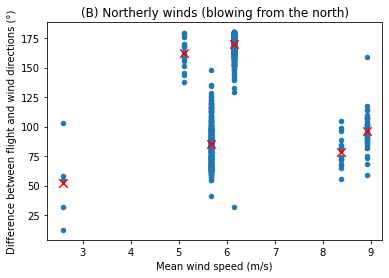

In [46]:
first_plot = df_m_added_cols_north.plot.scatter('mean_wind_speed', 'difference_directions')

df_m_mean_diff_north.plot.scatter('mean_wind_speed', 'mean_difference', marker='x', s=72, color='red', 
                                                ax=first_plot)

plt.xlabel('Mean wind speed (m/s)')

plt.ylabel('Difference between flight and wind directions (°)')

plt.title('(B) Northerly winds (blowing from the north)')

plt.show()

In [47]:
df_m_added_cols_south = df_m_added_cols[(df_m_added_cols['mean_wind_direction'] < 90) | 
                                        (df_m_added_cols['mean_wind_direction'] >= 270)]
print(df_m_added_cols_south.shape)

df_m_added_cols_south.head(2)

(1323, 46)


trackID              timeUTC               sunSet  \
818  KES120210327072209_37  2021-03-27 07:32:38  2021-03-27 00:47:34   
819  KES120210327072209_38  2021-03-27 07:32:52  2021-03-27 00:47:34   

                 sunRise  minAfterSet  minBefRise  locLon  locLat  startFrm  \
818  2021-03-27 12:24:44       405.07      292.10  -97.52   34.98     18863   
819  2021-03-27 12:24:44       405.30      291.87  -97.52   34.98     19281   

     endFrm  noFrames  frmsDet    durSec  moonSpd  scrnAzimuth  avgPixSz  \
818   18868         6        5  0.200000   0.1331    69.794884      15.2   
819   19284         4        4  0.133333   0.1753    77.724771      43.5   

     moonElevation  moonAzimuth  moonDistance  camRotCorr  moonDiamPix  \
818          51.72       235.75        362466   -0.174533          924   
819          51.68       235.81        362468   -0.174533          924   

     vidDim  bearing  maxPix      date actual_time  actual_hours  \
818     968     2.31    25.0  20210327      073238             7   
819     968   353.38    49.0  20210327      073252             7   

     actual_minutes  actual_seconds  actual_minutes_converted  \
818              32              38                  0.533333   
819              32              52                  0.533333   

     actual_seconds_converted  actual_time_converted    time  sum_of_eta  \
818                  0.010556               7.543889  073723  273.374945   
819                  0.014444               7.547778  073723  273.374945   

     mean_wind_speed  mean_wind_direction  hours  minutes  seconds  \
818         6.957543            14.447251      7       37       23   
819         6.957543            14.447251      7       37       23   

     minutes_converted  seconds_converted  time_converted  time_difference  \
818           0.616667           0.006389        7.623056         0.079167   
819           0.616667           0.006389        7.623056         0.075278   

     min_direction  max_direction  difference_directions  
818       2.310000      14.447251              12.137251  
819      14.447251     353.380000              21.067251

In [48]:
df_m_mean_diff_south = df_m_added_cols_south[['difference_directions', 'mean_wind_speed']].groupby(
    ['mean_wind_speed']).mean()

df_m_mean_diff_south = df_m_mean_diff_south.rename(columns={'difference_directions': 'mean_difference'})

df_m_mean_diff_south = df_m_mean_diff_south.reset_index()

print(df_m_mean_diff_south.shape)

df_m_mean_diff_south

(11, 2)


mean_wind_speed  mean_difference
0          1.637692        48.183175
1          2.859629        33.314345
2          5.192957        35.915021
3          5.542444        24.526716
4          5.695640        13.629313
5          5.988305        36.750552
6          6.463170        18.265295
7          6.957543        22.540194
8          8.497022        11.598745
9          9.851682        12.612187
10        11.747793        31.081600

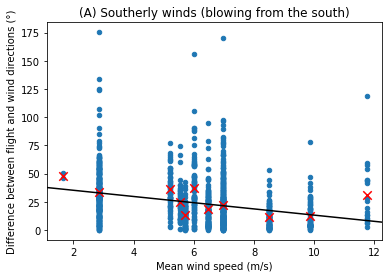

In [86]:
first_plot = df_m_added_cols_south.plot.scatter('mean_wind_speed', 'difference_directions')

second_plot = df_m_mean_diff_south.plot.scatter('mean_wind_speed', 'mean_difference', marker='x', s=72, color='red', ax=first_plot)

model_ols = smf.ols(formula='difference_directions ~ mean_wind_speed', data=df_m_added_cols_south)

res_ols = model_ols.fit()

abline_plot(model_results=res_ols, ax=second_plot, color='black')

plt.xlabel('Mean wind speed (m/s)')

plt.ylabel('Difference between flight and wind directions (°)')

plt.title('(A) Southerly winds (blowing from the south)')

plt.show()

In [50]:
scipy.stats.pearsonr(df_m_added_cols_south['mean_wind_speed'], df_m_added_cols_south['difference_directions'])

(-0.2842187220928145, 5.279149583763609e-26)

In [51]:
scipy.stats.pearsonr(df_m_added_cols_north['mean_wind_speed'], df_m_added_cols_north['difference_directions'])

(0.06858614202685728, 0.04147714923580935)

In [52]:
# df_m_added_cols.plot.scatter('mean_wind_speed', 'moonSpd')

# plt.show()

In [53]:
df_m_cnt_date = df_m_added_cols[['trackID', 'date']].groupby(['date']).count()

df_m_cnt_date = df_m_cnt_date.rename(columns={'trackID': 'track_cnt'})

df_m_cnt_date = df_m_cnt_date.reset_index()

print(len(df_m_cnt_date))

df_m_cnt_date

6


date  track_cnt
0  20210327       1149
1  20210328          5
2  20210329        302
3  20210330        135
4  20210425        483
5  20210526        133

In [54]:
df_m_cnt_res = df_m_added_cols[['trackID', 'date', 'time']].groupby(['date', 'time']).count()

df_m_cnt_res = df_m_cnt_res.rename(columns={'trackID': 'track_cnt'})

df_m_cnt_res = df_m_cnt_res.reset_index()

print(df_m_cnt_res.shape)

df_m_cnt_res

(232, 3)


date    time  track_cnt
0    20210327  011207          9
1    20210327  012142          8
2    20210327  013117          8
3    20210327  014053          7
4    20210327  015028          9
..        ...     ...        ...
227  20210526  053903          1
228  20210526  054553          1
229  20210526  054921          2
230  20210526  055619          1
231  20210526  055949          6

[232 rows x 3 columns]

In [55]:
df_sum_of_eta = df_m_added_cols[['date', 'hours', 'time', 'sum_of_eta']].drop_duplicates()
print(df_sum_of_eta.shape)

df_sum_of_eta

(232, 4)


date  hours    time  sum_of_eta
0     20210327      1  011207   79.127213
8     20210327      1  012142  104.884437
17    20210327      1  013117   93.991138
25    20210327      1  014053   82.288660
32    20210327      1  015028   79.433407
...        ...    ...     ...         ...
2199  20210526      4  045734  425.812954
2202  20210526      5  051508  411.899164
2203  20210526      5  051827  391.238961
2204  20210526      5  052152  409.415256
2205  20210526      5  052830  384.267496

[232 rows x 4 columns]

In [56]:
df_m_cnt_sum_eta = df_sum_of_eta.merge(df_m_cnt_res, on=['date', 'time'])
print(df_m_cnt_sum_eta.shape)

df_m_cnt_sum_eta

(232, 5)


date  hours    time  sum_of_eta  track_cnt
0    20210327      1  011207   79.127213          9
1    20210327      1  012142  104.884437          8
2    20210327      1  013117   93.991138          8
3    20210327      1  014053   82.288660          7
4    20210327      1  015028   79.433407          9
..        ...    ...     ...         ...        ...
227  20210526      4  045734  425.812954          2
228  20210526      5  051508  411.899164          1
229  20210526      5  051827  391.238961          2
230  20210526      5  052152  409.415256          1
231  20210526      5  052830  384.267496          1

[232 rows x 5 columns]

In [57]:
df_m_cnt_hour_res = df_m_cnt_sum_eta[['track_cnt', 'date', 'hours']].groupby(['date', 'hours']).sum()

df_m_cnt_hour_res = df_m_cnt_hour_res.reset_index()

print(len(df_m_cnt_hour_res))

df_m_cnt_hour_res

41


date  hours  track_cnt
0   20210327      1         41
1   20210327      2         89
2   20210327      3        126
3   20210327      4        132
4   20210327      5        150
5   20210327      6        189
6   20210327      7        178
7   20210327      8        114
8   20210327      9         89
9   20210327     10         41
10  20210328     10          3
11  20210328     11          2
12  20210329      1          2
13  20210329      2         12
14  20210329      3         29
15  20210329      4         36
16  20210329      5         53
17  20210329      6         23
18  20210329      7         35
19  20210329      8         42
20  20210329      9         32
21  20210329     10         26
22  20210329     11         12
23  20210330      3         12
24  20210330      4         13
25  20210330      5         42
26  20210330      6         20
27  20210330      7         17
28  20210330      8         14
29  20210330      9          6
30  20210330     10         11
31  20210425      2        174
32  20210425      3        122
33  20210425      4         25
34  20210425      8         10
35  20210425      9        128
36  20210425     10         24
37  20210526      2         33
38  20210526      3         32
39  20210526      4         50
40  20210526      5         18

In [58]:
df_sum_eta_hour = df_m_cnt_sum_eta[['sum_of_eta', 'date', 'hours']].groupby(['date', 'hours']).sum()

df_sum_eta_hour = df_sum_eta_hour.reset_index()

print(len(df_sum_eta_hour))

df_sum_eta_hour

41


date  hours   sum_of_eta
0   20210327      1   439.724855
1   20210327      2   759.244175
2   20210327      3  1203.867856
3   20210327      4  1643.332009
4   20210327      5  1749.634597
5   20210327      6  1917.137084
6   20210327      7  1610.663085
7   20210327      8  2234.789323
8   20210327      9  3973.837791
9   20210327     10   610.803913
10  20210328     10     7.838100
11  20210328     11    19.029992
12  20210329      1    19.842790
13  20210329      2   127.770115
14  20210329      3   271.277732
15  20210329      4   361.208808
16  20210329      5   475.430637
17  20210329      6   378.715854
18  20210329      7   337.652129
19  20210329      8   283.362522
20  20210329      9   257.723087
21  20210329     10   147.182907
22  20210329     11   168.699136
23  20210330      3   421.776473
24  20210330      4  1002.238633
25  20210330      5  1186.391543
26  20210330      6  1051.953124
27  20210330      7  1049.917067
28  20210330      8   786.038144
29  20210330      9   238.781896
30  20210330     10   217.121805
31  20210425      2  2276.881597
32  20210425      3  2208.887294
33  20210425      4   766.111316
34  20210425      8   393.925903
35  20210425      9  2297.143076
36  20210425     10   637.426940
37  20210526      2  1582.812261
38  20210526      3  3085.790793
39  20210526      4  7739.951357
40  20210526      5  3750.767471

In [59]:
df_m_cnt_sum_eta_cnt_hour = df_sum_eta_hour.merge(df_m_cnt_hour_res, on=['date', 'hours'])
print(len(df_m_cnt_sum_eta_cnt_hour))

df_m_cnt_sum_eta_cnt_hour

41


date  hours   sum_of_eta  track_cnt
0   20210327      1   439.724855         41
1   20210327      2   759.244175         89
2   20210327      3  1203.867856        126
3   20210327      4  1643.332009        132
4   20210327      5  1749.634597        150
5   20210327      6  1917.137084        189
6   20210327      7  1610.663085        178
7   20210327      8  2234.789323        114
8   20210327      9  3973.837791         89
9   20210327     10   610.803913         41
10  20210328     10     7.838100          3
11  20210328     11    19.029992          2
12  20210329      1    19.842790          2
13  20210329      2   127.770115         12
14  20210329      3   271.277732         29
15  20210329      4   361.208808         36
16  20210329      5   475.430637         53
17  20210329      6   378.715854         23
18  20210329      7   337.652129         35
19  20210329      8   283.362522         42
20  20210329      9   257.723087         32
21  20210329     10   147.182907         26
22  20210329     11   168.699136         12
23  20210330      3   421.776473         12
24  20210330      4  1002.238633         13
25  20210330      5  1186.391543         42
26  20210330      6  1051.953124         20
27  20210330      7  1049.917067         17
28  20210330      8   786.038144         14
29  20210330      9   238.781896          6
30  20210330     10   217.121805         11
31  20210425      2  2276.881597        174
32  20210425      3  2208.887294        122
33  20210425      4   766.111316         25
34  20210425      8   393.925903         10
35  20210425      9  2297.143076        128
36  20210425     10   637.426940         24
37  20210526      2  1582.812261         33
38  20210526      3  3085.790793         32
39  20210526      4  7739.951357         50
40  20210526      5  3750.767471         18

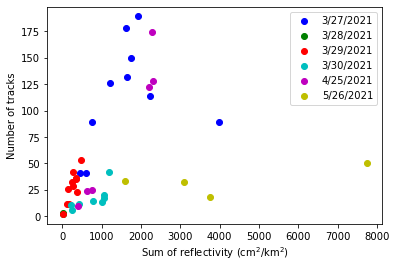

In [60]:
fig, ax = plt.subplots()

dates = ['3/27/2021', '3/28/2021', '3/29/2021', '3/30/2021', '4/25/2021', '5/26/2021']

colors = ['b', 'g', 'r', 'c', 'm', 'y']

for i in range(len(dates)):
    
    df_subset = df_m_cnt_sum_eta_cnt_hour[
        df_m_cnt_sum_eta_cnt_hour['date'] == df_m_cnt_sum_eta_cnt_hour['date'].unique()[i]]

    ax.scatter(df_subset['sum_of_eta'], df_subset['track_cnt'], c=colors[i], label=dates[i])

ax.legend()

plt.xlabel('Sum of reflectivity ($\mathrm{cm^2}$/$\mathrm{km^2}$)')

plt.ylabel('Number of tracks')

plt.show()

In [61]:
scipy.stats.pearsonr(df_m_cnt_sum_eta_cnt_hour['sum_of_eta'], df_m_cnt_sum_eta_cnt_hour['track_cnt'])

(0.36310439532573413, 0.019628850069644994)

In [62]:
df_m_cnt_sum_eta_cnt_hour_3_4 = df_m_cnt_sum_eta_cnt_hour[df_m_cnt_sum_eta_cnt_hour['date'] != '20210526']
print(len(df_m_cnt_sum_eta_cnt_hour_3_4))

37


In [63]:
scipy.stats.pearsonr(df_m_cnt_sum_eta_cnt_hour_3_4['sum_of_eta'], df_m_cnt_sum_eta_cnt_hour_3_4['track_cnt'])

(0.7421684985286137, 1.4609645159471365e-07)

In [ ]:
filename = 'Audio_Kessler_2021.csv'

df_rec = pd.read_csv(filename)
print(df_rec.shape)

df_rec.head(2)

In [ ]:
df_rec = df_rec[df_rec['Mig'] == 1]
print(df_rec.shape)

df_rec.head(2)

# duplicate?
# detection_time?

In [ ]:
df_rec = df_rec[df_rec['duplicate'] == 'no']
print(df_rec.shape)

df_rec.head(2)

In [ ]:
df_rec['local_time_datetime'] = pd.to_datetime(df_rec['real_detection_time.1'])
print(df_rec.shape)

df_rec.head(2)

In [ ]:
df_rec['local_time_datetime'] = df_rec['local_time_datetime'].dt.tz_localize(tz='US/Central')
print(df_rec.shape)

df_rec.head(2)

In [ ]:
df_rec['time_utc_datetime'] = df_rec['local_time_datetime'].dt.tz_convert(None)
print(df_rec.shape)

df_rec.head(2)

In [ ]:
df_rec['date_datetime'] = pd.to_datetime(df_rec['date'])
print(df_rec.shape)

df_rec.head(2)

In [ ]:
df_rec['date'] = df_rec['date_datetime'].dt.strftime('%Y%m%d')
print(df_rec.shape)

df_rec.head(2)

In [ ]:
df_rec['hours'] = pd.to_numeric(df_rec['time_utc_datetime'].dt.strftime('%H'))
print(df_rec.shape)

df_rec.head(2)

In [ ]:
len(df_rec['species'].unique())

In [ ]:
df_rec_cnt_date = df_rec[['date', 'hours']].groupby(['date']).count()

df_rec_cnt_date = df_rec_cnt_date.rename(columns={'hours': 'number_of_birds'})

df_rec_cnt_date = df_rec_cnt_date.reset_index()

print(df_rec_cnt_date.shape)

df_rec_cnt_date

In [ ]:
df_rec_cnt_date_species = df_rec[['date', 'species', 'hours']].groupby(['date', 'species']).count()

df_rec_cnt_date_species = df_rec_cnt_date_species.rename(columns={'hours': 'number_of_birds'})

df_rec_cnt_date_species = df_rec_cnt_date_species.reset_index()

print(df_rec_cnt_date_species.shape)

df_rec_cnt_date_species

In [ ]:
df_rec['date_hour_datetime'] = pd.to_datetime(df_rec['local_time_datetime'].dt.strftime('%Y-%m-%d %H'))
print(df_rec.shape)

df_rec.head(2)

In [ ]:
df_rec_cnt_hour = df_rec[['date_hour_datetime', 'date', 'hours', 'species']].groupby(
    ['date_hour_datetime', 'date', 'hours']).count()

df_rec_cnt_hour = df_rec_cnt_hour.rename(columns={'species': 'number_of_birds'})

df_rec_cnt_hour = df_rec_cnt_hour.reset_index()

print(df_rec_cnt_hour.shape)

df_rec_cnt_hour

In [ ]:
df_rec_cnt_hour_species = df_rec[['date', 'hours', 'species', 'season']].groupby(['date', 'hours', 'species']).count()

df_rec_cnt_hour_species = df_rec_cnt_hour_species.rename(columns={'species': 'number_of_birds'})

df_rec_cnt_hour_species = df_rec_cnt_hour_species.reset_index()

print(df_rec_cnt_hour_species.shape)

df_rec_cnt_hour_species

In [ ]:
df_rec_cnt_hour[df_rec_cnt_hour['date'] == '20210328'].plot.scatter(
    x='date_hour_datetime', y='number_of_birds', figsize=(10,4))

plt.xlabel('Time')

plt.ylabel('Number of individuals')

plt.show()

In [ ]:
df_rec_cnt_hour[df_rec_cnt_hour['date'] == '20210330'].plot.scatter(
    x='date_hour_datetime', y='number_of_birds', figsize=(10,4))

plt.xlabel('Time')

plt.ylabel('Number of individuals')

plt.show()

In [ ]:
df_rec_cnt_hour[df_rec_cnt_hour['date'] == '20210425'].plot.scatter(
    x='date_hour_datetime', y='number_of_birds', figsize=(10,4))

plt.xlabel('Time')

plt.ylabel('Number of individuals')

plt.show()

In [ ]:
df_rec_cnt_hour[df_rec_cnt_hour['date'] == '20210526'].plot.scatter(
    x='date_hour_datetime', y='number_of_birds', figsize=(10,4))

plt.xlabel('Time')

plt.ylabel('Number of individuals')

plt.show()

In [ ]:
df_m_sum_eta_rec_cnt_hour = df_m_cnt_sum_eta_cnt_hour.merge(df_rec_cnt_hour[['date', 'hours', 'number_of_birds']], 
                                                        on=['date', 'hours'])
print(df_m_sum_eta_rec_cnt_hour.shape)

df_m_sum_eta_rec_cnt_hour

In [ ]:
plt.scatter(df_m_sum_eta_rec_cnt_hour['track_cnt'], df_m_sum_eta_rec_cnt_hour['number_of_birds'], 
            c=df_m_sum_eta_rec_cnt_hour['date'].map(
                dict(zip(df_m_sum_eta_rec_cnt_hour['date'].unique(), ['b', 'g', 'r', 'c']))))

plt.xlabel('Number of tracks')

plt.ylabel('Number of individuals recorded')

plt.show()

In [ ]:
dict(zip(df_m_sum_eta_rec_cnt_hour['date'].unique(), ['b', 'g', 'r']))

In [ ]:
df_sum_eta_hour = df_all_added_cols[['date', 'hours', 'sum_of_eta']].groupby(['date', 'hours']).sum()

df_sum_eta_hour = df_sum_eta_hour.reset_index()

print(df_sum_eta_hour.shape)

df_sum_eta_hour

In [ ]:
df_sum_eta_rec_cnt_hour = df_sum_eta_hour.merge(df_rec_cnt_hour[['date', 'hours', 'number_of_birds']], 
                                                        on=['date', 'hours'])
print(df_sum_eta_rec_cnt_hour.shape)

df_sum_eta_rec_cnt_hour

In [ ]:
plt.scatter(df_sum_eta_rec_cnt_hour['sum_of_eta'], df_sum_eta_rec_cnt_hour['number_of_birds'], 
            c=df_sum_eta_rec_cnt_hour['date'].map(
                dict(zip(df_sum_eta_rec_cnt_hour['date'].unique(), ['b', 'g', 'r']))))

plt.xlabel('Sum of reflectivity')

plt.ylabel('Number of individuals recorded')

plt.show()

In [ ]:
dict(zip(df_sum_eta_rec_cnt_hour['date'].unique(), ['b', 'g', 'r']))

In [ ]:
df_rec_20210328 = df_rec[df_rec['date'] == '20210328']

df_rec_20210328 = df_rec_20210328.reset_index()

print(df_rec_20210328.shape)

df_rec_20210328.head(2)

In [ ]:
df_rec_20210330 = df_rec[df_rec['date'] == '20210330']

df_rec_20210330 = df_rec_20210330.reset_index()

print(df_rec_20210330.shape)

df_rec_20210330.head(2)

In [ ]:
df_rec_20210425 = df_rec[df_rec['date'] == '20210425']

df_rec_20210425 = df_rec_20210425.reset_index()

print(df_rec_20210425.shape)

df_rec_20210425.head(2)

In [ ]:
df_rec_20210526 = df_rec[df_rec['date'] == '20210526']

df_rec_20210526 = df_rec_20210526.reset_index()

print(df_rec_20210526.shape)

df_rec_20210526.head(2)

In [ ]:
df_rec_cnt_species_20210328 = df_rec_20210328[['species', 'hours']].groupby(['species']).count()

df_rec_cnt_species_20210328 = df_rec_cnt_species_20210328.rename(columns={'hours': '2021/03/28'})

df_rec_cnt_species_20210328 = df_rec_cnt_species_20210328.reset_index()

print(df_rec_cnt_species_20210328.shape)

df_rec_cnt_species_20210328

In [ ]:
df_rec_cnt_species_20210330 = df_rec_20210330[['species', 'hours']].groupby(['species']).count()

df_rec_cnt_species_20210330 = df_rec_cnt_species_20210330.rename(columns={'hours': '2021/03/30'})

df_rec_cnt_species_20210330 = df_rec_cnt_species_20210330.reset_index()

print(df_rec_cnt_species_20210330.shape)

df_rec_cnt_species_20210330

In [ ]:
df_rec_cnt_species_20210425 = df_rec_20210425[['species', 'hours']].groupby(['species']).count()

df_rec_cnt_species_20210425 = df_rec_cnt_species_20210425.rename(columns={'hours': '2021/04/25'})

df_rec_cnt_species_20210425 = df_rec_cnt_species_20210425.reset_index()

print(df_rec_cnt_species_20210425.shape)

df_rec_cnt_species_20210425

In [ ]:
df_rec_cnt_species_20210526 = df_rec_20210526[['species', 'hours']].groupby(['species']).count()

df_rec_cnt_species_20210526 = df_rec_cnt_species_20210526.rename(columns={'hours': '2021/05/26'})

df_rec_cnt_species_20210526 = df_rec_cnt_species_20210526.reset_index()

print(df_rec_cnt_species_20210526.shape)

df_rec_cnt_species_20210526

In [ ]:
df_rec_cnt_species = df_rec_cnt_species_20210328.merge(df_rec_cnt_species_20210330, on='species', how='outer')
print(df_rec_cnt_species.shape)

df_rec_cnt_species

In [ ]:
df_rec_cnt_species = df_rec_cnt_species.merge(df_rec_cnt_species_20210425, on='species', how='outer')
print(df_rec_cnt_species.shape)

df_rec_cnt_species = df_rec_cnt_species.merge(df_rec_cnt_species_20210526, on='species', how='outer')
print(df_rec_cnt_species.shape)

df_rec_cnt_species

In [ ]:
df_rec_cnt_species = df_rec_cnt_species.fillna(0)
print(df_rec_cnt_species.shape)

df_rec_cnt_species

In [ ]:
df_rec_cnt_species[['2021/03/28', '2021/03/30', '2021/04/25', '2021/05/26']] = df_rec_cnt_species[['2021/03/28', '2021/03/30', '2021/04/25', '2021/05/26']].astype(int)
print(df_rec_cnt_species.shape)

df_rec_cnt_species

In [ ]:
df_rec_cnt_species['Number of individuals per species'] = df_rec_cnt_species[[
    '2021/03/28', '2021/03/30', '2021/04/25', '2021/05/26']].sum(axis=1)
print(df_rec_cnt_species.shape)

df_rec_cnt_species

In [ ]:
df_rec_cnt_species.loc['Number of individuals per day', :] = df_rec_cnt_species[[
    '2021/03/28', '2021/03/30', '2021/04/25', '2021/05/26', 'Number of individuals per species']].sum(axis=0)
print(df_rec_cnt_species.shape)

df_rec_cnt_species

In [64]:
list_folders = sorted([i for i in os.listdir(path + 'VPR_PX1000/') if '20210' in i])
print(len(list_folders))

print(list_folders)

6
['20210327', '20210328', '20210329', '20210330', '20210425', '20210526']


In [65]:
list_all_dates = []
list_all_times = []
list_sum_eta = []
list_all_hours = []
list_all_minutes = []
list_all_seconds = []
list_all_minutes_converted = []
list_all_seconds_converted = []
list_all_times_converted = []

for folder_index in range(len(list_folders)):
    
    path_to_file = 'VPR_PX1000/' + list_folders[folder_index]

    list_files = sorted([i for i in os.listdir(path + path_to_file) if 'vpr_20210' in i])
    print(len(list_files))

    print(list_files)

    for file_index in range(len(list_files)):
        
        filename = list_files[file_index]
        
        print(path_to_file + '/' + filename)
        
        filename_date = filename[4:12]
        print(filename_date)

        filename_time = filename[13:19]
        print(filename_time)
        
        filename_time_hours = int(filename_time[0:2])
        print(filename_time_hours)

        filename_time_minutes = int(filename_time[2:4])
        print(filename_time_minutes)

        filename_time_seconds = int(filename_time[4:6])
        print(filename_time_seconds)

        filename_time_minutes_converted = filename_time_minutes/60
        print(filename_time_minutes_converted)

        filename_time_seconds_converted = filename_time_seconds/60/60
        print(filename_time_seconds_converted)

        filename_time_converted = filename_time_hours + filename_time_minutes_converted + \
        filename_time_seconds_converted
        print(filename_time_converted)
        
        list_all_dates.append(filename_date)
        
        list_all_times.append(filename_time)
        
        list_all_hours.append(filename_time_hours)
        
        list_all_minutes.append(filename_time_minutes)
        
        list_all_seconds.append(filename_time_seconds)
        
        list_all_minutes_converted.append(filename_time_minutes_converted)
        
        list_all_seconds_converted.append(filename_time_seconds_converted)
        
        list_all_times_converted.append(filename_time_converted)

        df = pd.read_csv(path_to_file + '/' + filename, names=['height', 'eta'])
        print(df.shape)

        # above ground level (meters)
        # reflectivity (cm^2/km^3)
        
        if filename_date == '20210526':
            
            max_height = 1
            
        else:
            
            max_height = 0.5
            
        if df['height'].dtype == 'O':
            
            df['height'] = df['height'].str.replace('q', '')
            
            df['height'] = pd.to_numeric(df['height'])
            
            print(df.shape)

        df = df[(df['height'] <= max_height)]
        print(df.shape)

        print(df.head(2))

#         df.plot.scatter('eta', 'height')

#         plt.show()
        
        list_sum_eta.append(df['eta'].sum(axis=0))

71
['vpr_20210327_000000.csv', 'vpr_20210327_001000.csv', 'vpr_20210327_002000.csv', 'vpr_20210327_003000.csv', 'vpr_20210327_004000.csv', 'vpr_20210327_005000.csv', 'vpr_20210327_010000.csv', 'vpr_20210327_011000.csv', 'vpr_20210327_012000.csv', 'vpr_20210327_013000.csv', 'vpr_20210327_014000.csv', 'vpr_20210327_015000.csv', 'vpr_20210327_020000.csv', 'vpr_20210327_021000.csv', 'vpr_20210327_022000.csv', 'vpr_20210327_023000.csv', 'vpr_20210327_024000.csv', 'vpr_20210327_025000.csv', 'vpr_20210327_030000.csv', 'vpr_20210327_031000.csv', 'vpr_20210327_032000.csv', 'vpr_20210327_033000.csv', 'vpr_20210327_034000.csv', 'vpr_20210327_035000.csv', 'vpr_20210327_040000.csv', 'vpr_20210327_041000.csv', 'vpr_20210327_042000.csv', 'vpr_20210327_043000.csv', 'vpr_20210327_044000.csv', 'vpr_20210327_045000.csv', 'vpr_20210327_050000.csv', 'vpr_20210327_051000.csv', 'vpr_20210327_052000.csv', 'vpr_20210327_053000.csv', 'vpr_20210327_054000.csv', 'vpr_20210327_055000.csv', 'vpr_20210327_060000.csv

(51, 2)
(6, 2)
   height           eta
0     0.0  10726.574794
1     0.1    491.887620
VPR_PX1000/20210327/vpr_20210327_061000.csv
20210327
061000
6
10
0
0.16666666666666666
0.0
6.166666666666667
(51, 2)
(6, 2)
   height          eta
0     0.0  3556.968710
1     0.1   604.060041
VPR_PX1000/20210327/vpr_20210327_062000.csv
20210327
062000
6
20
0
0.3333333333333333
0.0
6.333333333333333
(51, 2)
(6, 2)
   height          eta
0     0.0  8909.513924
1     0.1   623.781284
VPR_PX1000/20210327/vpr_20210327_063000.csv
20210327
063000
6
30
0
0.5
0.0
6.5
(51, 2)
(6, 2)
   height          eta
0     0.0  2595.465934
1     0.1   611.127373
VPR_PX1000/20210327/vpr_20210327_064000.csv
20210327
064000
6
40
0
0.6666666666666666
0.0
6.666666666666667
(51, 2)
(6, 2)
   height          eta
0     0.0  1919.906793
1     0.1   595.762588
VPR_PX1000/20210327/vpr_20210327_065000.csv
20210327
065000
6
50
0
0.8333333333333334
0.0
6.833333333333333
(51, 2)
(6, 2)
   height          eta
0     0.0  5683.064961
1   

(51, 2)
(6, 2)
   height            eta
0     0.0  476675.414687
1     0.1     897.132454
VPR_PX1000/20210328/vpr_20210328_003000.csv
20210328
003000
0
30
0
0.5
0.0
0.5
(51, 2)
(6, 2)
   height           eta
0     0.0  1.001969e+06
1     0.1  7.945050e+02
VPR_PX1000/20210328/vpr_20210328_004000.csv
20210328
004000
0
40
0
0.6666666666666666
0.0
0.6666666666666666
(51, 2)
(6, 2)
   height            eta
0     0.0  470716.004272
1     0.1    2964.107736
VPR_PX1000/20210328/vpr_20210328_005000.csv
20210328
005000
0
50
0
0.8333333333333334
0.0
0.8333333333333334
(51, 2)
(6, 2)
   height            eta
0     0.0  215172.696858
1     0.1     561.286430
VPR_PX1000/20210328/vpr_20210328_010000.csv
20210328
010000
1
0
0
0.0
0.0
1.0
(51, 2)
(6, 2)
   height            eta
0     0.0  249152.252755
1     0.1    1575.945342
VPR_PX1000/20210328/vpr_20210328_011000.csv
20210328
011000
1
10
0
0.16666666666666666
0.0
1.1666666666666667
(51, 2)
(6, 2)
   height            eta
0     0.0  278936.038801
1  

1     0.1  346.826374
VPR_PX1000/20210329/vpr_20210329_002000.csv
20210329
002000
0
20
0
0.3333333333333333
0.0
0.3333333333333333
(51, 2)
(6, 2)
   height          eta
0     0.0  5361.625155
1     0.1  1023.511549
VPR_PX1000/20210329/vpr_20210329_003000.csv
20210329
003000
0
30
0
0.5
0.0
0.5
(51, 2)
(6, 2)
   height           eta
0     0.0  31349.903266
1     0.1    333.262918
VPR_PX1000/20210329/vpr_20210329_004000.csv
20210329
004000
0
40
0
0.6666666666666666
0.0
0.6666666666666666
(51, 2)
(6, 2)
   height           eta
0     0.0  36381.258620
1     0.1    274.028225
VPR_PX1000/20210329/vpr_20210329_005000.csv
20210329
005000
0
50
0
0.8333333333333334
0.0
0.8333333333333334
(51, 2)
(6, 2)
   height           eta
0     0.0  28234.161208
1     0.1    301.465148
VPR_PX1000/20210329/vpr_20210329_010000.csv
20210329
010000
1
0
0
0.0
0.0
1.0
(51, 2)
(6, 2)
   height           eta
0     0.0  22299.542287
1     0.1    308.726358
VPR_PX1000/20210329/vpr_20210329_011000.csv
20210329
011000
1


(51, 2)
(6, 2)
   height          eta
0     0.0  1828.877846
1     0.1   660.327704
VPR_PX1000/20210329/vpr_20210329_075000.csv
20210329
075000
7
50
0
0.8333333333333334
0.0
7.833333333333333
(51, 2)
(6, 2)
   height          eta
0     0.0  1991.698766
1     0.1   689.169675
VPR_PX1000/20210329/vpr_20210329_080000.csv
20210329
080000
8
0
0
0.0
0.0
8.0
(51, 2)
(6, 2)
   height           eta
0     0.0  52708.635313
1     0.1    663.043021
VPR_PX1000/20210329/vpr_20210329_081000.csv
20210329
081000
8
10
0
0.16666666666666666
0.0
8.166666666666666
(51, 2)
(6, 2)
   height          eta
0     0.0  2950.289824
1     0.1   706.925789
VPR_PX1000/20210329/vpr_20210329_082000.csv
20210329
082000
8
20
0
0.3333333333333333
0.0
8.333333333333334
(51, 2)
(6, 2)
   height           eta
0     0.0  28697.052728
1     0.1    655.835435
VPR_PX1000/20210329/vpr_20210329_083000.csv
20210329
083000
8
30
0
0.5
0.0
8.5
(51, 2)
(6, 2)
   height          eta
0     0.0  3125.054767
1     0.1   707.827613
VPR_PX10

(51, 2)
(6, 2)
   height          eta
0     0.0  9504.554997
1     0.1  1345.830249
VPR_PX1000/20210330/vpr_20210330_020000.csv
20210330
020000
2
0
0
0.0
0.0
2.0
(51, 2)
(6, 2)
   height           eta
0     0.0  22639.758876
1     0.1    726.921728
VPR_PX1000/20210330/vpr_20210330_021000.csv
20210330
021000
2
10
0
0.16666666666666666
0.0
2.1666666666666665
(51, 2)
(6, 2)
   height           eta
0     0.0  28381.996983
1     0.1    691.426666
VPR_PX1000/20210330/vpr_20210330_022000.csv
20210330
022000
2
20
0
0.3333333333333333
0.0
2.3333333333333335
(51, 2)
(6, 2)
   height           eta
0     0.0  43675.053911
1     0.1    676.982495
VPR_PX1000/20210330/vpr_20210330_023000.csv
20210330
023000
2
30
0
0.5
0.0
2.5
(51, 2)
(6, 2)
   height            eta
0     0.0  193056.973757
1     0.1    1036.885111
VPR_PX1000/20210330/vpr_20210330_024000.csv
20210330
024000
2
40
0
0.6666666666666666
0.0
2.6666666666666665
(51, 2)
(6, 2)
   height           eta
0     0.0  82784.932702
1     0.1    896.

1     0.1  0.0
VPR_PX1000/20210425/vpr_20210425_011000.csv
20210425
011000
1
10
0
0.16666666666666666
0.0
1.1666666666666667
(51, 2)
(6, 2)
   height  eta
0     0.0  0.0
1     0.1  0.0
VPR_PX1000/20210425/vpr_20210425_012000.csv
20210425
012000
1
20
0
0.3333333333333333
0.0
1.3333333333333333
(51, 2)
(6, 2)
   height  eta
0     0.0  0.0
1     0.1  0.0
VPR_PX1000/20210425/vpr_20210425_013000.csv
20210425
013000
1
30
0
0.5
0.0
1.5
(51, 2)
(51, 2)
(6, 2)
   height  eta
0     0.0  0.0
1     0.1  0.0
VPR_PX1000/20210425/vpr_20210425_014000.csv
20210425
014000
1
40
0
0.6666666666666666
0.0
1.6666666666666665
(51, 2)
(6, 2)
   height  eta
0     0.0  0.0
1     0.1  0.0
VPR_PX1000/20210425/vpr_20210425_015000.csv
20210425
015000
1
50
0
0.8333333333333334
0.0
1.8333333333333335
(51, 2)
(6, 2)
   height  eta
0     0.0  0.0
1     0.1  0.0
VPR_PX1000/20210425/vpr_20210425_020000.csv
20210425
020000
2
0
0
0.0
0.0
2.0
(51, 2)
(6, 2)
   height          eta
0     0.0  3379.198817
1     0.1  1449.057618

(51, 2)
(6, 2)
   height          eta
0     0.0  2486.920421
1     0.1  1385.789732
VPR_PX1000/20210425/vpr_20210425_090000.csv
20210425
090000
9
0
0
0.0
0.0
9.0
(51, 2)
(6, 2)
   height          eta
0     0.0  1940.649992
1     0.1  1252.977336
VPR_PX1000/20210425/vpr_20210425_091000.csv
20210425
091000
9
10
0
0.16666666666666666
0.0
9.166666666666666
(51, 2)
(6, 2)
   height          eta
0     0.0  4816.730273
1     0.1  1784.429395
VPR_PX1000/20210425/vpr_20210425_092000.csv
20210425
092000
9
20
0
0.3333333333333333
0.0
9.333333333333334
(51, 2)
(6, 2)
   height          eta
0     0.0  5536.167738
1     0.1  1536.269626
VPR_PX1000/20210425/vpr_20210425_093000.csv
20210425
093000
9
30
0
0.5
0.0
9.5
(51, 2)
(6, 2)
   height          eta
0     0.0  2870.307447
1     0.1  1608.287760
VPR_PX1000/20210425/vpr_20210425_094000.csv
20210425
094000
9
40
0
0.6666666666666666
0.0
9.666666666666666
(51, 2)
(6, 2)
   height          eta
0     0.0  4014.304872
1     0.1  1078.140069
VPR_PX1000/202

(51, 2)
(11, 2)
   height         eta
0     0.0  511.882396
1     0.1  498.117006
VPR_PX1000/20210526/vpr_20210526_031000.csv
20210526
031000
3
10
0
0.16666666666666666
0.0
3.1666666666666665
(51, 2)
(11, 2)
   height         eta
0     0.0  527.471803
1     0.1  523.319105
VPR_PX1000/20210526/vpr_20210526_032000.csv
20210526
032000
3
20
0
0.3333333333333333
0.0
3.3333333333333335
(51, 2)
(11, 2)
   height         eta
0     0.0  467.348923
1     0.1  461.179742
VPR_PX1000/20210526/vpr_20210526_033000.csv
20210526
033000
3
30
0
0.5
0.0
3.5
(51, 2)
(11, 2)
   height         eta
0     0.0  432.151947
1     0.1  459.034713
VPR_PX1000/20210526/vpr_20210526_034000.csv
20210526
034000
3
40
0
0.6666666666666666
0.0
3.6666666666666665
(51, 2)
(11, 2)
   height         eta
0     0.0  424.809764
1     0.1  490.061347
VPR_PX1000/20210526/vpr_20210526_035000.csv
20210526
035000
3
50
0
0.8333333333333334
0.0
3.8333333333333335
(51, 2)
(11, 2)
   height         eta
0     0.0  437.198185
1     0.1  514

In [66]:
df_px = pd.DataFrame(data={'date': list_all_dates, 'time_PX1000': list_all_times, 'sum_of_eta_PX1000': list_sum_eta, 
                           'hours_PX1000': list_all_hours, 'minutes_PX1000': list_all_minutes, 
                           'seconds_PX1000': list_all_seconds, 
                           'minutes_converted_PX1000': list_all_minutes_converted, 
                           'seconds_converted_PX1000': list_all_seconds_converted, 
                           'time_converted_PX1000': list_all_times_converted})
print(df_px.shape)

df_px.head(2)

(423, 9)


date time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0  20210327      000000       13000.272258             0               0   
1  20210327      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  
0               0.000000  
1               0.166667

In [67]:
print(df_all_added_cols.shape)

df_all_added_cols.head(2)

(492, 11)


date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  000458   96.245742         5.103788            181.45099      0   
1  20210327  001434  102.304289         5.103788            181.45099      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  
0        4       58           0.066667           0.016111        0.082778  
1       14       34           0.233333           0.009444        0.242778

In [68]:
cnt = 0

for i in range(len(df_all_added_cols)):

    df_row_merged = df_all_added_cols.iloc[[i]].merge(df_px, on='date')
    
    df_row_merged['time_difference'] = (df_row_merged['time_converted'] - \
                                        df_row_merged['time_converted_PX1000']).abs()

    print(df_row_merged.shape)
    
    print(df_row_merged.head(2))

    df_row = df_row_merged.iloc[[df_row_merged['time_difference'].idxmin()]]
    print(df_row.shape)

    print(df_row)

    if cnt == 0:

        df_px_added_cols = df_row

    else:

        df_px_added_cols = pd.concat([df_px_added_cols, df_row])

    print(df_px_added_cols.shape)

    print(df_px_added_cols)

    cnt += 1

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  000458   96.245742         5.103788            181.45099      0   
1  20210327  000458   96.245742         5.103788            181.45099      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        4       58           0.066667           0.016111        0.082778   
1        4       58           0.066667           0.016111        0.082778   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         0.082778  
1          

(6, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  000458   96.245742         5.103788            181.45099      0   
1  20210327  001434  102.304289         5.103788            181.45099      0   
2  20210327  002410  123.218705         5.103788            181.45099      0   
3  20210327  003344  106.255423         5.103788            181.45099      0   
4  20210327  004320   84.400120         5.103788            181.45099      0   
5  20210327  005256   51.318411         5.103788            181.45099      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        4       58           0.066667           0.016111        0.082778   
1       14       34           0.233333           0.009444        0.242778   
2       24       10           0.400000           0.002778        0.402778   
3       33       44           0.550000           0.012222        0.562222   
4       43       20           0.716667        

8               1.333333         0.028333  
(9, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  000458   96.245742         5.103788            181.45099      0   
1  20210327  001434  102.304289         5.103788            181.45099      0   
2  20210327  002410  123.218705         5.103788            181.45099      0   
3  20210327  003344  106.255423         5.103788            181.45099      0   
4  20210327  004320   84.400120         5.103788            181.45099      0   
5  20210327  005256   51.318411         5.103788            181.45099      0   
6  20210327  010231   44.623072         5.103788            181.45099      1   
7  20210327  011207   79.127213         5.103788            181.45099      1   
8  20210327  012142  104.884437         5.103788            181.45099      1   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        4       58           0.066667           0.016111        0.082

1               0.166667         1.833889  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
12  20210327  020002   78.164637         5.660233           263.015141      2   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
12        0        2                0.0           0.000556        2.000556   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
12      020000        8062.853575             2               0   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
12               0                       0.0                       0.0   

    time_converted_PX1000  time_difference  
12                    2.0         0.000556  
(13, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2 

14               2.333333         0.013333  
(15, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
5   20210327  005256   51.318411         5.103788           181.450990      0   
6   20210327  010231   44.623072         5.103788           181.450990      1   
7   20210327  011207   79.127213         5.103788           181.450990      1   
8   20210327  012142  104.884437         5.103788           181.450990      1   
9   20210327  013117   93.991138         5.660233           263.015141      1   
10  20210327  014053   82.288660         5.660233      

1               0.166667         2.472778  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
16  20210327  023822  121.062495         5.660233           263.015141      2   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
16       38       22           0.633333           0.006111        2.639444   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
16      024000       14989.267542             2              40   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
16               0                  0.666667                       0.0   

    time_converted_PX1000  time_difference  
16               2.666667         0.027222  
(17, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2 

(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
19  20210327  030707  156.303082         5.660233           263.015141      3   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
19        7        7           0.116667           0.001944        3.118611   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
19      031000        8858.317183             3              10   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
19               0                  0.166667                       0.0   

    time_converted_PX1000  time_difference  
19               3.166667         0.048056  
(20, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103

21                    3.5         0.061667  
(22, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
5   20210327  005256   51.318411         5.103788           181.450990      0   
6   20210327  010231   44.623072         5.103788           181.450990      1   
7   20210327  011207   79.127213         5.103788           181.450990      1   
8   20210327  012142  104.884437         5.103788           181.450990      1   
9   20210327  013117   93.991138         5.660233           263.015141      1   
10  20210327  014053   82.288660         5.660233      

(24, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
5   20210327  005256   51.318411         5.103788           181.450990      0   
6   20210327  010231   44.623072         5.103788           181.450990      1   
7   20210327  011207   79.127213         5.103788           181.450990      1   
8   20210327  012142  104.884437         5.103788           181.450990      1   
9   20210327  013117   93.991138         5.660233           263.015141      1   
10  20210327  014053   82.288660         5.660233           263.015141      1   
11  20210327  01502

1               0.166667         3.942778  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
25  20210327  040634  255.274166         5.660233           263.015141      4   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
25        6       34                0.1           0.009444        4.109444   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
25      041000       12965.315103             4              10   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
25               0                  0.166667                       0.0   

    time_converted_PX1000  time_difference  
25               4.166667         0.057222  
(26, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2 

        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
26  20210327  041609  266.359017         5.660233           263.015141      4   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
26       16        9           0.266667             0.0025        4.269167   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
26      042000        6468.596732             4              20   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
26               0                  0.333333                       0.0   

    time_converted_PX1000  time_difference  
26               4.333333         0.064167  
(27, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788     

28               4.666667         0.078333  
(29, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
5   20210327  005256   51.318411         5.103788           181.450990      0   
6   20210327  010231   44.623072         5.103788           181.450990      1   
7   20210327  011207   79.127213         5.103788           181.450990      1   
8   20210327  012142  104.884437         5.103788           181.450990      1   
9   20210327  013117   93.991138         5.660233           263.015141      1   
10  20210327  014053   82.288660         5.660233      

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  051337  298.149617         6.158851           175.880081      5   
1  20210327  051337  298.149617         6.158851           175.880081      5   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       13       37           0.216667           0.010278        5.226944   
1       13       37           0.216667           0.010278        5.226944   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         5.226944  
1          

32               5.333333         0.053333  
(34, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
5   20210327  005256   51.318411         5.103788           181.450990      0   
6   20210327  010231   44.623072         5.103788           181.450990      1   
7   20210327  011207   79.127213         5.103788           181.450990      1   
8   20210327  012142  104.884437         5.103788           181.450990      1   
9   20210327  013117   93.991138         5.660233           263.015141      1   
10  20210327  014053   82.288660         5.660233      

33                    5.5         0.046389  
(35, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
5   20210327  005256   51.318411         5.103788           181.450990      0   
6   20210327  010231   44.623072         5.103788           181.450990      1   
7   20210327  011207   79.127213         5.103788           181.450990      1   
8   20210327  012142  104.884437         5.103788           181.450990      1   
9   20210327  013117   93.991138         5.660233           263.015141      1   
10  20210327  014053   82.288660         5.660233      

34               5.666667         0.039444  
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  055157  276.473095         6.158851           175.880081      5   
1  20210327  055157  276.473095         6.158851           175.880081      5   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       51       57               0.85           0.015833        5.865833   
1       51       57               0.85           0.015833        5.865833   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0         

37               6.166667         0.019167  
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  062043  270.795023         6.158851           175.880081      6   
1  20210327  062043  270.795023         6.158851           175.880081      6   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       20       43           0.333333           0.011944        6.345278   
1       20       43           0.333333           0.011944        6.345278   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0         

39               6.500000         0.005278  
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  063953   276.90902         6.158851           175.880081      6   
1  20210327  063953   276.90902         6.158851           175.880081      6   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       39       53               0.65           0.014722        6.664722   
1       39       53               0.65           0.014722        6.664722   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0         

1               0.166667         6.657778  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
41  20210327  064928  270.989963         6.158851           175.880081      6   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
41       49       28           0.816667           0.007778        6.824444   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
41      065000       10848.111108             6              50   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
41               0                  0.833333                       0.0   

    time_converted_PX1000  time_difference  
41               6.833333         0.008889  
(43, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2 

42                    7.0         0.015833  
(44, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
5   20210327  005256   51.318411         5.103788           181.450990      0   
6   20210327  010231   44.623072         5.103788           181.450990      1   
7   20210327  011207   79.127213         5.103788           181.450990      1   
8   20210327  012142  104.884437         5.103788           181.450990      1   
9   20210327  013117   93.991138         5.660233           263.015141      1   
10  20210327  014053   82.288660         5.660233      

44               7.333333         0.029722  
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  072748  268.474806         6.158851           175.880081      7   
1  20210327  072748  268.474806         6.158851           175.880081      7   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       27       48               0.45           0.013333        7.463333   
1       27       48               0.45           0.013333        7.463333   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0         

1               0.166667         7.456389  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
46  20210327  073723  273.374945         6.957543            14.447251      7   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
46       37       23           0.616667           0.006389        7.623056   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
46      074000        8630.690922             7              40   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
46               0                  0.666667                       0.0   

    time_converted_PX1000  time_difference  
46               7.666667         0.043611  
(48, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2 

47               7.833333         0.050833  
(49, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
5   20210327  005256   51.318411         5.103788           181.450990      0   
6   20210327  010231   44.623072         5.103788           181.450990      1   
7   20210327  011207   79.127213         5.103788           181.450990      1   
8   20210327  012142  104.884437         5.103788           181.450990      1   
9   20210327  013117   93.991138         5.660233           263.015141      1   
10  20210327  014053   82.288660         5.660233      

(50, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
5   20210327  005256   51.318411         5.103788           181.450990      0   
6   20210327  010231   44.623072         5.103788           181.450990      1   
7   20210327  011207   79.127213         5.103788           181.450990      1   
8   20210327  012142  104.884437         5.103788           181.450990      1   
9   20210327  013117   93.991138         5.660233           263.015141      1   
10  20210327  014053   82.288660         5.660233           263.015141      1   
11  20210327  01502

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  081542  241.116202         6.957543            14.447251      8   
1  20210327  081542  241.116202         6.957543            14.447251      8   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       15       42               0.25           0.011667        8.261667   
1       15       42               0.25           0.011667        8.261667   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         8.261667  
1          

50               8.333333         0.071667  
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  082517  248.901807         6.957543            14.447251      8   
1  20210327  082517  248.901807         6.957543            14.447251      8   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       25       17           0.416667           0.004722        8.421389   
1       25       17           0.416667           0.004722        8.421389   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0         

53               8.833333         0.035000  
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  085124   248.12286         6.957543            14.447251      8   
1  20210327  085124   248.12286         6.957543            14.447251      8   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       51       24               0.85           0.006667        8.856667   
1       51       24               0.85           0.006667        8.856667   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0         

54               9.000000         0.027222  
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  090151  240.457959         6.957543            14.447251      9   
1  20210327  090151  240.457959         6.957543            14.447251      9   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        1       51           0.016667           0.014167        9.030833   
1        1       51           0.016667           0.014167        9.030833   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0         

54               9.000000         0.030833  
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  090519  235.830621         6.957543            14.447251      9   
1  20210327  090519  235.830621         6.957543            14.447251      9   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        5       19           0.083333           0.005278        9.088611   
1        5       19           0.083333           0.005278        9.088611   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0         

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  091551  234.883614         6.957543            14.447251      9   
1  20210327  091551  234.883614         6.957543            14.447251      9   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       15       51               0.25           0.014167        9.264167   
1       15       51               0.25           0.014167        9.264167   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         9.264167  
1          

1               0.166667         9.276944  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
57  20210327  092637  231.424657         6.957543            14.447251      9   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
57       26       37           0.433333           0.010278        9.443611   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
57      093000       51429.227108             9              30   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
57               0                       0.5                       0.0   

    time_converted_PX1000  time_difference  
57                    9.5         0.056389  
(67, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2 

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  093349  235.844189         6.957543            14.447251      9   
1  20210327  093349  235.844189         6.957543            14.447251      9   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       33       49               0.55           0.013611        9.563611   
1       33       49               0.55           0.013611        9.563611   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         9.563611  
1          

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  094059  235.060937         6.957543            14.447251      9   
1  20210327  094059  235.060937         6.957543            14.447251      9   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       40       59           0.666667           0.016389        9.683056   
1       40       59           0.666667           0.016389        9.683056   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         9.683056  
1          

59               9.833333         0.029722  
(74, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
58  20210327  093723  228.067760         6.957543            14.447251      9   
58  20210327  094059  235.060937         6.957543            14.447251      9   
58  20210327  094434  232.817698         6.957543            14.447251      9   
59  20210327  094810  241.367429         6.957543            14.447251      9   
59  20210327  095147  234.565890         6.957543      

[75 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  095900  220.682343         6.957543            14.447251      9   
1  20210327  095900  220.682343         6.957543            14.447251      9   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       59        0           0.983333                0.0        9.983333   
1       59        0           0.983333                0.0        9.983333   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000        

[77 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  101808  204.694904         6.957543            14.447251     10   
1  20210327  101808  204.694904         6.957543            14.447251     10   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       18        8                0.3           0.002222       10.302222   
1       18        8                0.3           0.002222       10.302222   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000        

1               0.166667        10.455000  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
64  20210327  103718  196.126546        10.371144            39.586572     10   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
64       37       18           0.616667              0.005       10.621667   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
64      104000        9576.160181            10              40   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
64               0                  0.666667                       0.0   

    time_converted_PX1000  time_difference  
64              10.666667            0.045  
(80, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2 

        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
62  20210327  101808  204.694904         6.957543            14.447251     10   
63  20210327  102743  195.627265         6.957543            14.447251     10   
64  20210327  103718  196.126546        10.371144            39.586572     10   
65  20210327  104652  188.672983        10.371144            39.586572     10   
66  20210327  105627  179.948224        10.371144            39.586572     10   

    minutes  seconds  minut

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  111536  143.980329        10.371144            39.586572     11   
1  20210327  111536  143.980329        10.371144            39.586572     11   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       15       36               0.25               0.01           11.26   
1       15       36               0.25               0.01           11.26   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000        11.260000  
1          

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  114421   83.083815        10.371144            39.586572     11   
1  20210327  114421   83.083815        10.371144            39.586572     11   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       44       21           0.733333           0.005833       11.739167   
1       44       21           0.733333           0.005833       11.739167   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000        11.739167  
1          

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210328  103454      7.8381          2.57985           209.742172     10   
1  20210328  103454      7.8381          2.57985           209.742172     10   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       34       54           0.566667              0.015       10.581667   
1       34       54           0.566667              0.015       10.581667   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      259155.495881             0               0   
1      001000      336545.239729             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000        10.581667  
1          

65              10.833333         0.068333  
(91, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
70  20210327  114421   83.083815        10.371144            39.586572     11   
70  20210327  115356   39.650538        10.371144            39.586572     11   
63  20210328  103454    7.838100         2.579850           209.742172     10   
64  20210328  104430    9.220916         2.579850           209.742172     10   
65  20210328  105406    8.281482         2.579850      

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210328  112252    7.628942          2.57985           209.742172     11   
1  20210328  112252    7.628942          2.57985           209.742172     11   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       22       52           0.366667           0.014444       11.381111   
1       22       52           0.366667           0.014444       11.381111   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      259155.495881             0               0   
1      001000      336545.239729             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000        11.381111  
1          

[95 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210328  114203   13.417203          2.57985           209.742172     11   
1  20210328  114203   13.417203          2.57985           209.742172     11   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       42        3                0.7           0.000833       11.700833   
1       42        3                0.7           0.000833       11.700833   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      259155.495881             0               0   
1      001000      336545.239729             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000        

[98 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  001226   86.172359         1.637692            35.943175      0   
1  20210329  001226   86.172359         1.637692            35.943175      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       12       26                0.2           0.007222        0.207222   
1       12       26                0.2           0.007222        0.207222   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000        

[102 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  005049   31.939161         1.637692            35.943175      0   
1  20210329  005049   31.939161         1.637692            35.943175      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       50       49           0.833333           0.013611        0.846944   
1       50       49           0.833333           0.013611        0.846944   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[105 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  011935    19.84279         1.637692            35.943175      1   
1  20210329  011935    19.84279         1.637692            35.943175      1   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       19       35           0.316667           0.009722        1.326389   
1       19       35           0.316667           0.009722        1.326389   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[108 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  014823   22.171049         5.192957            24.232807      1   
1  20210329  014823   22.171049         5.192957            24.232807      1   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       48       23                0.8           0.006389        1.806389   
1       48       23                0.8           0.006389        1.806389   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  020733   23.642059         5.192957            24.232807      2   
1  20210329  020733   23.642059         5.192957            24.232807      2   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        7       33           0.116667           0.009167        2.125833   
1        7       33           0.116667           0.009167        2.125833   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         2.125833  
1          

(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
15  20210329  022644   29.280504         5.192957            24.232807      2   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
15       26       44           0.433333           0.012222        2.445556   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
15      023000        8396.490481             2              30   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
15               0                       0.5                       0.0   

    time_converted_PX1000  time_difference  
15                    2.5         0.054444  
(113, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.10

        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
13  20210329  020733   23.642059         5.192957            24.232807      2   
14  20210329  021709   27.235312         5.192957            24.232807      2   
15  20210329  022644   29.280504         5.192957            24.232807      2   
16  20210329  023619   33.437041         5.192957            24.232807      2   
17  20210329  024554   35.452158         5.192957            24.232807      2   

    minutes  seconds  minut

19               3.166667         0.081944  
(117, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
15  20210329  022644   29.280504         5.192957            24.232807      2   
16  20210329  023619   33.437041         5.192957            24.232807      2   
17  20210329  024554   35.452158         5.192957            24.232807      2   
18  20210329  025530   37.817258         5.192957            24.232807      2   
19  20210329  030505   39.039435         5.192957     

        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
17  20210329  024554   35.452158         5.192957            24.232807      2   
18  20210329  025530   37.817258         5.192957            24.232807      2   
19  20210329  030505   39.039435         5.192957            24.232807      3   
19  20210329  031441   43.436182         5.192957            24.232807      3   
20  20210329  032417   44.005868         5.192957            24.232807      3   

    minutes  seconds  minut

[121 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  035456   53.326209         5.192957            24.232807      3   
1  20210329  035456   53.326209         5.192957            24.232807      3   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       54       56                0.9           0.015556        3.915556   
1       54       56                0.9           0.015556        3.915556   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[123 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  041406   56.671411         5.192957            24.232807      4   
1  20210329  041406   56.671411         5.192957            24.232807      4   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       14        6           0.233333           0.001667           4.235   
1       14        6           0.233333           0.001667           4.235   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

1               0.166667         4.707778  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
29  20210329  045228   64.542512          5.69564            15.131118      4   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
29       52       28           0.866667           0.007778        4.874444   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
29      045000       22007.490001             4              50   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
29               0                  0.833333                       0.0   

    time_converted_PX1000  time_difference  
29               4.833333         0.041111  
(128, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

[129 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  051138   66.571969          5.69564            15.131118      5   
1  20210329  051138   66.571969          5.69564            15.131118      5   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       11       38           0.183333           0.010556        5.193889   
1       11       38           0.183333           0.010556        5.193889   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  055000   66.189636          5.69564            15.131118      5   
1  20210329  055000   66.189636          5.69564            15.131118      5   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       50        0           0.833333                0.0        5.833333   
1       50        0           0.833333                0.0        5.833333   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         5.833333  
1          

1               0.166667         5.985833  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
37  20210329  060909    65.68464          5.69564            15.131118      6   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
37        9        9               0.15             0.0025          6.1525   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
37      061000        8188.299073             6              10   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
37               0                  0.166667                       0.0   

    time_converted_PX1000  time_difference  
37               6.166667         0.014167  
(136, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  064729   60.395961          5.69564            15.131118      6   
1  20210329  064729   60.395961          5.69564            15.131118      6   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       47       29           0.783333           0.008056        6.791389   
1       47       29           0.783333           0.008056        6.791389   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         6.791389  
1          

[142 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  071614   60.112012          5.69564            15.131118      7   
1  20210329  071614   60.112012          5.69564            15.131118      7   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       16       14           0.266667           0.003889        7.270556   
1       16       14           0.266667           0.003889        7.270556   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(145, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
42  20210329  065705   60.364506         5.695640            15.131118      6   
43  20210329  070639   59.609350         5.695640            15.131118      7   
44  20210329  071614   60.112012         5.695640            15.131118      7   
45  20210329  072549   58.734012         5.695640            15.131118      7   
46  20210329  073524   53.600996         8.497022            25.130089      7   

    minutes  seco

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  080409   50.356671         8.497022            25.130089      8   
1  20210329  080409   50.356671         8.497022            25.130089      8   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        4        9           0.066667             0.0025        8.069167   
1        4        9           0.066667             0.0025        8.069167   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         8.069167  
1          

1               0.166667         8.221944  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
50  20210329  082319    48.04969         8.497022            25.130089      8   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
50       23       19           0.383333           0.005278        8.388611   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
50      082000       32318.743651             8              20   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
50               0                  0.333333                       0.0   

    time_converted_PX1000  time_difference  
50               8.333333         0.055278  
(150, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  084230   46.060629         8.497022            25.130089      8   
1  20210329  084230   46.060629         8.497022            25.130089      8   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       42       30                0.7           0.008333        8.708333   
1       42       30                0.7           0.008333        8.708333   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         8.708333  
1          

[155 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  092050   39.036318         8.497022            25.130089      9   
1  20210329  092050   39.036318         8.497022            25.130089      9   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       20       50           0.333333           0.013889        9.347222   
1       20       50           0.333333           0.013889        9.347222   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[159 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  095911   31.616295         8.497022            25.130089      9   
1  20210329  095911   31.616295         8.497022            25.130089      9   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       59       11           0.983333           0.003056        9.986389   
1       59       11           0.983333           0.003056        9.986389   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(163, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
59  20210329  094935   31.813014         8.497022            25.130089      9   
60  20210329  095911   31.616295         8.497022            25.130089      9   
61  20210329  100846   31.034772         8.497022            25.130089     10   
62  20210329  101822   31.271519         8.497022            25.130089     10   
63  20210329  102757   28.564997         8.497022            25.130089     10   

    minutes  seco

(165, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
61  20210329  100846   31.034772         8.497022            25.130089     10   
62  20210329  101822   31.271519         8.497022            25.130089     10   
63  20210329  102757   28.564997         8.497022            25.130089     10   
64  20210329  103732   27.421920        11.747793            33.951778     10   
65  20210329  104707   29.105903        11.747793            33.951778     10   

    minutes  seco

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  110619   27.117649        11.747793            33.951778     11   
1  20210329  110619   27.117649        11.747793            33.951778     11   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        6       19                0.1           0.005278       11.105278   
1        6       19                0.1           0.005278       11.105278   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000        11.105278  
1          

70              11.666667         0.082222  
(170, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
66  20210329  105643   28.889700        11.747793            33.951778     10   
67  20210329  110619   27.117649        11.747793            33.951778     11   
68  20210329  111553   30.713212        11.747793            33.951778     11   
69  20210329  112528   30.796950        11.747793            33.951778     11   
70  20210329  113504   34.394494        11.747793     

[173 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  001449   68.389471         6.325282             7.982284      0   
1  20210330  001449   68.389471         6.325282             7.982284      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       14       49           0.233333           0.013611        0.246944   
1       14       49           0.233333           0.013611        0.246944   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  004334   46.272593         6.325282             7.982284      0   
1  20210330  004334   46.272593         6.325282             7.982284      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       43       34           0.716667           0.009444        0.726111   
1       43       34           0.716667           0.009444        0.726111   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         0.726111  
1          

[179 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  011219    39.36219         6.325282             7.982284      1   
1  20210330  011219    39.36219         6.325282             7.982284      1   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       12       19                0.2           0.005278        1.205278   
1       12       19                0.2           0.005278        1.205278   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

1               0.166667         1.517778  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
10  20210330  014104   59.020976         8.374328            97.092454      1   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
10       41        4           0.683333           0.001111        1.684444   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
10      014000       17219.399944             1              40   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
10               0                  0.666667                       0.0   

    time_converted_PX1000  time_difference  
10               1.666667         0.017778  
(183, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

(186, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
9   20210330  013129   58.461265         8.374328            97.092454      1   
10  20210330  014104   59.020976         8.374328            97.092454      1   
11  20210330  015039   57.812492         8.374328            97.092454      1   
12  20210330  020014   59.296965         8.374328            97.092454      2   
13  20210330  020949   63.857131         8.374328            97.092454      2   

    minutes  seco

(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
15  20210330  022859   79.325598         8.374328            97.092454      2   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
15       28       59           0.466667           0.016389        2.483056   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
15      023000      196931.916745             2              30   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
15               0                       0.5                       0.0   

    time_converted_PX1000  time_difference  
15                    2.5         0.016944  
(188, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.10

[190 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  025743   104.10934         8.374328            97.092454      2   
1  20210330  025743   104.10934         8.374328            97.092454      2   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       57       43               0.95           0.011944        2.961944   
1       57       43               0.95           0.011944        2.961944   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[192 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  031653  124.402079         8.374328            97.092454      3   
1  20210330  031653  124.402079         8.374328            97.092454      3   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       16       53           0.266667           0.014722        3.281389   
1       16       53           0.266667           0.014722        3.281389   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[195 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  034538   150.08571         8.374328            97.092454      3   
1  20210330  034538   150.08571         8.374328            97.092454      3   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       45       38               0.75           0.010556        3.760556   
1       45       38               0.75           0.010556        3.760556   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  040656  169.992953         8.374328            97.092454      4   
1  20210330  040656  169.992953         8.374328            97.092454      4   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        6       56                0.1           0.015556        4.115556   
1        6       56                0.1           0.015556        4.115556   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         4.115556  
1          

1               0.166667         4.268333  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
27  20210330  042606  187.640912         8.374328            97.092454      4   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
27       26        6           0.433333           0.001667           4.435   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
27      043000      210189.325321             4              30   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
27               0                       0.5                       0.0   

    time_converted_PX1000  time_difference  
27                    4.5            0.065  
(200, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
26  20210330  041631  176.363594         8.374328            97.092454      4   
27  20210330  042606  187.640912         8.374328            97.092454      4   
28  20210330  043541  210.493029         9.851682            13.934545      4   
29  20210330  044516  225.542081         9.851682            13.934545      4   
29  20210330  045451  219.846975         9.851682            13.934545      4   

    minutes  seconds  minut

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  051400  199.534086         9.851682            13.934545      5   
1  20210330  051400  199.534086         9.851682            13.934545      5   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       14        0           0.233333                0.0        5.233333   
1       14        0           0.233333                0.0        5.233333   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         5.233333  
1          

1               0.166667         5.386389  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
33  20210330  053311  202.359196         9.851682            13.934545      5   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
33       33       11               0.55           0.003056        5.553056   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
33      053000         69919.8051             5              30   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
33               0                       0.5                       0.0   

    time_converted_PX1000  time_difference  
33                    5.5         0.053056  
(207, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

[208 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  055221  191.043855         9.851682            13.934545      5   
1  20210330  055221  191.043855         9.851682            13.934545      5   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       52       21           0.866667           0.005833          5.8725   
1       52       21           0.866667           0.005833          5.8725   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  061130   179.96591         9.851682            13.934545      6   
1  20210330  061130   179.96591         9.851682            13.934545      6   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       11       30           0.183333           0.008333        6.191667   
1       11       30           0.183333           0.008333        6.191667   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         6.191667  
1          

[213 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  064016  166.485662         9.851682            13.934545      6   
1  20210330  064016  166.485662         9.851682            13.934545      6   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       40       16           0.666667           0.004444        6.671111   
1       40       16           0.666667           0.004444        6.671111   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[215 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  065925  175.661312         9.851682            13.934545      6   
1  20210330  065925  175.661312         9.851682            13.934545      6   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       59       25           0.983333           0.006944        6.990278   
1       59       25           0.983333           0.006944        6.990278   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  071835  177.245327         9.851682            13.934545      7   
1  20210330  071835  177.245327         9.851682            13.934545      7   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       18       35                0.3           0.009722        7.309722   
1       18       35                0.3           0.009722        7.309722   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         7.309722  
1          

(220, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
42  20210330  065925  175.661312         9.851682            13.934545      6   
43  20210330  070900  179.221583         9.851682            13.934545      7   
44  20210330  071835  177.245327         9.851682            13.934545      7   
45  20210330  072809  175.932329         9.851682            13.934545      7   
46  20210330  073744  174.481719         8.915223           104.688086      7   

    minutes  seco

[222 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  080628  168.229954         8.915223           104.688086      8   
1  20210330  080628  168.229954         8.915223           104.688086      8   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        6       28                0.1           0.007778        8.107778   
1        6       28                0.1           0.007778        8.107778   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[225 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  083512  160.370796         8.915223           104.688086      8   
1  20210330  083512  160.370796         8.915223           104.688086      8   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       35       12           0.583333           0.003333        8.586667   
1       35       12           0.583333           0.003333        8.586667   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[227 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  085421  147.842332         8.915223           104.688086      8   
1  20210330  085421  147.842332         8.915223           104.688086      8   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       54       21                0.9           0.005833        8.905833   
1       54       21                0.9           0.005833        8.905833   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(230, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
52  20210330  083512  160.370796         8.915223           104.688086      8   
52  20210330  084446  151.380586         8.915223           104.688086      8   
53  20210330  085421  147.842332         8.915223           104.688086      8   
54  20210330  090356  135.017649         8.915223           104.688086      9   
55  20210330  091332  134.855819         8.915223           104.688086      9   

    minutes  seco

(232, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
53  20210330  085421  147.842332         8.915223           104.688086      8   
54  20210330  090356  135.017649         8.915223           104.688086      9   
55  20210330  091332  134.855819         8.915223           104.688086      9   
56  20210330  092306  130.608994         8.915223           104.688086      9   
57  20210330  093241  124.215289         8.915223           104.688086      9   

    minutes  seco

(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
59  20210330  095151  114.566608         8.915223           104.688086      9   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
59       51       51               0.85           0.014167        9.864167   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
59      095000        5993.312804             9              50   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
59               0                  0.833333                       0.0   

    time_converted_PX1000  time_difference  
59               9.833333         0.030833  
(234, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.10

[235 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  101101  104.985459         8.915223           104.688086     10   
1  20210330  101101  104.985459         8.915223           104.688086     10   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       11        1           0.183333           0.000278       10.183611   
1       11        1           0.183333           0.000278       10.183611   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[239 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  104920   81.969964        11.504146            31.494576     10   
1  20210330  104920   81.969964        11.504146            31.494576     10   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       49       20           0.816667           0.005556       10.822222   
1       49       20           0.816667           0.005556       10.822222   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(243, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
64  20210330  103946   89.440558        11.504146            31.494576     10   
65  20210330  104920   81.969964        11.504146            31.494576     10   
66  20210330  105855   80.051530        11.504146            31.494576     10   
67  20210330  110831   72.324728        11.504146            31.494576     11   
68  20210330  111805   61.976070        11.504146            31.494576     11   

    minutes  seco

[246 rows x 20 columns]
(72, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210330  115624    24.49276        11.504146            31.494576     11   
1  20210330  115624    24.49276        11.504146            31.494576     11   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       56       24           0.933333           0.006667           11.94   
1       56       24           0.933333           0.006667           11.94   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000      173687.481069             0               0   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[249 rows x 20 columns]
(65, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  002425   854.46432         0.244471           229.433563      0   
1  20210425  002425   854.46432         0.244471           229.433563      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       24       25                0.4           0.006944        0.406944   
1       24       25                0.4           0.006944        0.406944   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   
1      011000                0.0             1              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               1.000000       

1               1.166667         0.280833  
(1, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  005309  279.052031         0.244471           229.433563      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       53        9           0.883333             0.0025        0.885833   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                       0.0                       0.0   

   time_converted_PX1000  time_difference  
0                    1.0         0.114167  
(253, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   2021032

(255, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
0   20210425  003400  708.373698         0.244471           229.433563      0   
0   20210425  004335  440.879997         0.244471           229.433563      0   
0   20210425  005309  279.052031         0.244471           229.433563      0   
0   20210425  010244  192.621083         0.244471           229.433563      1   
1   20210425  011219  116.122060         0.244471           229.433563      1   

    minutes  seco

(1, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
5  20210425  015039  255.156994         2.859629           316.972641      1   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
5       50       39           0.833333           0.010833        1.844167   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
5      015000                0.0             1              50   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
5               0                  0.833333                       0.0   

   time_converted_PX1000  time_difference  
5               1.833333         0.010833  
(259, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788      

7               2.166667         0.003056  
(261, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
3   20210425  013129  107.500866         2.859629           316.972641      1   
4   20210425  014104  234.113865         2.859629           316.972641      1   
5   20210425  015039  255.156994         2.859629           316.972641      1   
6   20210425  020014  273.041762         2.859629           316.972641      2   
7   20210425  020949  288.795923         2.859629      

[262 rows x 20 columns]
(65, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  022859  333.010434         2.859629           316.972641      2   
1  20210425  022859  333.010434         2.859629           316.972641      2   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       28       59           0.466667           0.016389        2.483056   
1       28       59           0.466667           0.016389        2.483056   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   
1      011000                0.0             1              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               1.000000       

[265 rows x 20 columns]
(65, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  025743  363.407075         2.859629           316.972641      2   
1  20210425  025743  363.407075         2.859629           316.972641      2   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       57       43               0.95           0.011944        2.961944   
1       57       43               0.95           0.011944        2.961944   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   
1      011000                0.0             1              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               1.000000       

[268 rows x 20 columns]
(65, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  032627  369.942232         2.859629           316.972641      3   
1  20210425  032627  369.942232         2.859629           316.972641      3   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       26       27           0.433333             0.0075        3.440833   
1       26       27           0.433333             0.0075        3.440833   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   
1      011000                0.0             1              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               1.000000       

18                    4.0             0.08  
(272, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
14  20210425  031653  362.957515         2.859629           316.972641      3   
15  20210425  032627  369.942232         2.859629           316.972641      3   
16  20210425  033602  367.662782         2.859629           316.972641      3   
17  20210425  034537  368.182678         2.859629           316.972641      3   
18  20210425  035512  375.261042         2.859629     

(65, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  042356  386.793496         2.859629           316.972641      4   
1  20210425  042356  386.793496         2.859629           316.972641      4   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       23       56           0.383333           0.015556        4.398889   
1       23       56           0.383333           0.015556        4.398889   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   
1      011000                0.0             1              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               1.000000         3.398889  
1          

1               1.166667         3.711389  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
23  20210425  045241  389.368698         6.442068           315.567973      4   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
23       52       41           0.866667           0.011389        4.878056   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
23      045000        14023.91774             4              50   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
23               0                  0.833333                       0.0   

    time_converted_PX1000  time_difference  
23               4.833333         0.044722  
(278, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

[279 rows x 20 columns]
(65, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  051151  392.597355         6.442068           315.567973      5   
1  20210425  051151  392.597355         6.442068           315.567973      5   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       11       51           0.183333           0.014167          5.1975   
1       11       51           0.183333           0.014167          5.1975   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   
1      011000                0.0             1              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               1.000000       

27                    5.5         0.049167  
(282, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
23  20210425  045241  389.368698         6.442068           315.567973      4   
24  20210425  050215  387.666935         6.442068           315.567973      5   
25  20210425  051151  392.597355         6.442068           315.567973      5   
26  20210425  052126  388.619939         6.442068           315.567973      5   
27  20210425  053257  390.959521         6.442068     

(65, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  060140  381.592407         6.442068           315.567973      6   
1  20210425  060140  381.592407         6.442068           315.567973      6   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        1       40           0.016667           0.011111        6.027778   
1        1       40           0.016667           0.011111        6.027778   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   
1      011000                0.0             1              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               1.000000         5.027778  
1          

(287, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
28  20210425  054231  377.873822         6.442068           315.567973      5   
29  20210425  055206  376.698854         6.442068           315.567973      5   
30  20210425  060140  381.592407         6.442068           315.567973      6   
31  20210425  061115  385.770695         6.442068           315.567973      6   
32  20210425  062050  383.256417         6.442068           315.567973      6   

    minutes  seco

1               1.166667         5.499722  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
34  20210425  063959  391.448984         6.442068           315.567973      6   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
34       39       59               0.65           0.016389        6.666389   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
34      064000       14811.796845             6              40   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
34               0                  0.666667                       0.0   

    time_converted_PX1000  time_difference  
34               6.666667         0.000278  
(289, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

(291, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
32  20210425  062050  383.256417         6.442068           315.567973      6   
33  20210425  063024  390.165897         6.442068           315.567973      6   
34  20210425  063959  391.448984         6.442068           315.567973      6   
35  20210425  064934  410.757037         6.442068           315.567973      6   
36  20210425  065909  414.410438         6.442068           315.567973      6   

    minutes  seco

[293 rows x 20 columns]
(65, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  072754  408.195149         6.442068           315.567973      7   
1  20210425  072754  408.195149         6.442068           315.567973      7   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       27       54               0.45              0.015           7.465   
1       27       54               0.45              0.015           7.465   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   
1      011000                0.0             1              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               1.000000       

        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
38  20210425  071818  410.163091         6.442068           315.567973      7   
39  20210425  072754  408.195149         6.442068           315.567973      7   
40  20210425  073729  415.358881         6.463170           334.482524      7   
41  20210425  074704  426.265161         6.463170           334.482524      7   
42  20210425  075639  416.878051         6.463170           334.482524      7   

    minutes  seconds  minut

1               1.166667         7.256667  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
45  20210425  082524  396.207851          6.46317           334.482524      8   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
45       25       24           0.416667           0.006667        8.423333   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
45      083000       10969.294213             8              30   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
45               0                       0.5                       0.0   

    time_converted_PX1000  time_difference  
45                    8.5         0.076667  
(300, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

1               1.166667         7.576111  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
46  20210425  084434   396.23461          6.46317           334.482524      8   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
46       44       34           0.733333           0.009444        8.742778   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
46      084000       11406.270257             8              40   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
46               0                  0.666667                       0.0   

    time_converted_PX1000  time_difference  
46               8.666667         0.076111  
(302, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

(65, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  091321  390.265912          6.46317           334.482524      9   
1  20210425  091321  390.265912          6.46317           334.482524      9   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       13       21           0.216667           0.005833          9.2225   
1       13       21           0.216667           0.005833          9.2225   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   
1      011000                0.0             1              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               1.000000         8.222500  
1          

(307, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
47  20210425  085410  393.925903         6.463170           334.482524      8   
48  20210425  090345  391.824750         6.463170           334.482524      9   
49  20210425  091321  390.265912         6.463170           334.482524      9   
50  20210425  092256  397.624896         6.463170           334.482524      9   
51  20210425  093231  387.794104         6.463170           334.482524      9   

    minutes  seco

1               1.166667         8.694722  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
53  20210425  095141  355.930765          6.46317           334.482524      9   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
53       51       41               0.85           0.011389        9.861389   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
53      095000       12846.907813             9              50   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
53               0                  0.833333                       0.0   

    time_converted_PX1000  time_difference  
53               9.833333         0.028056  
(309, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

[310 rows x 20 columns]
(65, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  101052  308.379511          6.46317           334.482524     10   
1  20210425  101052  308.379511          6.46317           334.482524     10   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       10       52           0.166667           0.014444       10.181111   
1       10       52           0.166667           0.014444       10.181111   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   
1      011000                0.0             1              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               1.000000       

        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
53  20210425  095141  355.930765         6.463170           334.482524      9   
54  20210425  100117  329.047429         6.463170           334.482524     10   
55  20210425  101052  308.379511         6.463170           334.482524     10   
56  20210425  102028  299.962376         6.463170           334.482524     10   
57  20210425  103004  275.635467         5.494330           179.521543     10   

    minutes  seconds  minut

1               1.166667         9.653889  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
59  20210425  104914   236.18147          5.49433           179.521543     10   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
59       49       14           0.816667           0.003889       10.820556   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
59      105000        7796.631865            10              50   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
59               0                  0.833333                       0.0   

    time_converted_PX1000  time_difference  
59              10.833333         0.012778  
(315, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

1               1.166667         9.973611  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
61  20210425  110825   106.63078          5.49433           179.521543     11   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
61        8       25           0.133333           0.006944       11.140278   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
61      111000       10026.404093            11              10   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
61               0                  0.166667                       0.0   

    time_converted_PX1000  time_difference  
61              11.166667         0.026389  
(317, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

[319 rows x 20 columns]
(65, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  113713  322.298923          5.49433           179.521543     11   
1  20210425  113713  322.298923          5.49433           179.521543     11   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       37       13           0.616667           0.003611       11.620278   
1       37       13           0.616667           0.003611       11.620278   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   
1      011000                0.0             1              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               1.000000       

[322 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  000039  256.806075         3.893771           320.764374      0   
1  20210526  000039  256.806075         3.893771           320.764374      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        0       39                0.0           0.010833        0.010833   
1        0       39                0.0           0.010833        0.010833   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

1               0.166667         0.070000  
(1, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
1  20210526  001412  260.964532         3.893771           320.764374      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
1       14       12           0.233333           0.003333        0.236667   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
1               0.166667             0.07  
(326, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   2021032

        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
1   20210526  000508  255.977517         3.893771           320.764374      0   
1   20210526  000937  265.243436         3.893771           320.764374      0   
1   20210526  001412  260.964532         3.893771           320.764374      0   
2   20210526  001847  235.279629         3.893771           320.764374      0   
2   20210526  002323  234.873208         3.893771           320.764374      0   

    minutes  seconds  minut

(1, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
3  20210526  003228  200.963097         3.893771           320.764374      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
3       32       28           0.533333           0.007778        0.541111   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
3      003000        6146.978944             0              30   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
3               0                       0.5                       0.0   

   time_converted_PX1000  time_difference  
3                    0.5         0.041111  
(330, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788      

[331 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  004128  164.762185         3.893771           320.764374      0   
1  20210526  004128  164.762185         3.893771           320.764374      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       41       28           0.683333           0.007778        0.691111   
1       41       28           0.683333           0.007778        0.691111   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(334, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
3   20210526  003228  200.963097         3.893771           320.764374      0   
4   20210526  003659  171.320746         3.893771           320.764374      0   
4   20210526  004128  164.762185         3.893771           320.764374      0   
5   20210526  004556  137.550330         3.893771           320.764374      0   
5   20210526  005011  127.657223         3.893771           320.764374      0   

    minutes  seco

1               0.166667         0.816667  
(1, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
6  20210526  005900  115.711391         3.893771           320.764374      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
6       59        0           0.983333                0.0        0.983333   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
6      010000        5027.816607             1               0   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
6               0                       0.0                       0.0   

   time_converted_PX1000  time_difference  
6                    1.0         0.016667  
(336, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   2021032

[337 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  010758  110.741939         3.893771           320.764374      1   
1  20210526  010758  110.741939         3.893771           320.764374      1   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        7       58           0.116667           0.016111        1.132778   
1        7       58           0.116667           0.016111        1.132778   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(340, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
6   20210526  005900  115.711391         3.893771           320.764374      0   
6   20210526  010329  115.641351         3.893771           320.764374      1   
7   20210526  010758  110.741939         3.893771           320.764374      1   
7   20210526  011227  110.368134         3.893771           320.764374      1   
8   20210526  011655  106.860456         3.893771           320.764374      1   

    minutes  seco

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  012606  107.566038         3.893771           320.764374      1   
1  20210526  012606  107.566038         3.893771           320.764374      1   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       26        6           0.433333           0.001667           1.435   
1       26        6           0.433333           0.001667           1.435   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         1.435000  
1          

(344, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
8   20210526  011655  106.860456         3.893771           320.764374      1   
8   20210526  012131  110.590928         3.893771           320.764374      1   
9   20210526  012606  107.566038         3.893771           320.764374      1   
9   20210526  013035   95.292798         5.988305           340.234172      1   
10  20210526  013511   83.472715         5.988305           340.234172      1   

    minutes  seco

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  014416   54.966752         5.988305           340.234172      1   
1  20210526  014416   54.966752         5.988305           340.234172      1   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       44       16           0.733333           0.004444        1.737778   
1       44       16           0.733333           0.004444        1.737778   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         1.737778  
1          

[347 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  015325    52.11888         5.988305           340.234172      1   
1  20210526  015325    52.11888         5.988305           340.234172      1   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       53       25           0.883333           0.006944        1.890278   
1       53       25           0.883333           0.006944        1.890278   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  020712  133.720022         5.988305           340.234172      2   
1  20210526  020712  133.720022         5.988305           340.234172      2   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        7       12           0.116667           0.003333            2.12   
1        7       12           0.116667           0.003333            2.12   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         2.120000  
1          

1               0.166667         2.182778  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
14  20210526  022058  367.418877         5.988305           340.234172      2   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
14       20       58           0.333333           0.016111        2.349444   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
14      022000        3939.860813             2              20   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
14               0                  0.333333                       0.0   

    time_converted_PX1000  time_difference  
14               2.333333         0.016111  
(354, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

1               0.166667         2.502222  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
16  20210526  024008  505.179143         5.988305           340.234172      2   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
16       40        8           0.666667           0.002222        2.668889   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
16      024000        4129.847257             2              40   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
16               0                  0.666667                       0.0   

    time_converted_PX1000  time_difference  
16               2.666667         0.002222  
(356, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

1               0.166667         2.822222  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
18  20210526  025920  457.019404         5.988305           340.234172      2   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
18       59       20           0.983333           0.005556        2.988889   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
18      030000        3635.461403             3               0   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
18               0                       0.0                       0.0   

    time_converted_PX1000  time_difference  
18                    3.0         0.011111  
(358, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

19               3.166667         0.060278  
(360, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
16  20210526  024008  505.179143         5.988305           340.234172      2   
17  20210526  024943  486.971156         5.988305           340.234172      2   
18  20210526  025920  457.019404         5.988305           340.234172      2   
18  20210526  030246  457.027661         5.988305           340.234172      3   
19  20210526  030623  441.025660         5.988305     

[362 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  031710  433.959726         5.988305           340.234172      3   
1  20210526  031710  433.959726         5.988305           340.234172      3   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       17       10           0.283333           0.002778        3.286111   
1       17       10           0.283333           0.002778        3.286111   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[364 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  032424   432.60694         5.988305           340.234172      3   
1  20210526  032424   432.60694         5.988305           340.234172      3   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       24       24                0.4           0.006667        3.406667   
1       24       24                0.4           0.006667        3.406667   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(368, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
20  20210526  032047  428.422283         5.988305           340.234172      3   
20  20210526  032424  432.606940         5.988305           340.234172      3   
21  20210526  032800  426.320485         5.988305           340.234172      3   
21  20210526  033136  423.196145         5.988305           340.234172      3   
22  20210526  033514  423.925104         5.988305           340.234172      3   

    minutes  seco

[369 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  034225  439.054446         5.988305           340.234172      3   
1  20210526  034225  439.054446         5.988305           340.234172      3   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       42       25                0.7           0.006944        3.706944   
1       42       25                0.7           0.006944        3.706944   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[372 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  035251  455.209785         5.988305           340.234172      3   
1  20210526  035251  455.209785         5.988305           340.234172      3   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       52       51           0.866667           0.014167        3.880833   
1       52       51           0.866667           0.014167        3.880833   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  040341  454.576722         5.988305           340.234172      4   
1  20210526  040341  454.576722         5.988305           340.234172      4   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        3       41               0.05           0.011389        4.061389   
1        3       41               0.05           0.011389        4.061389   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         4.061389  
1          

[378 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  041429  462.781213         5.988305           340.234172      4   
1  20210526  041429  462.781213         5.988305           340.234172      4   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       14       29           0.233333           0.008056        4.241389   
1       14       29           0.233333           0.008056        4.241389   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  042516   454.41669         5.988305           340.234172      4   
1  20210526  042516   454.41669         5.988305           340.234172      4   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       25       16           0.416667           0.004444        4.421111   
1       25       16           0.416667           0.004444        4.421111   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         4.421111  
1          

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  043229  471.364526         5.542444            13.542843      4   
1  20210526  043229  471.364526         5.542444            13.542843      4   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       32       29           0.533333           0.008056        4.541389   
1       32       29           0.533333           0.008056        4.541389   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         4.541389  
1          

[388 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  045029  437.395722         5.542444            13.542843      4   
1  20210526  045029  437.395722         5.542444            13.542843      4   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       50       29           0.833333           0.008056        4.841389   
1       50       29           0.833333           0.008056        4.841389   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  045734  425.812954         5.542444            13.542843      4   
1  20210526  045734  425.812954         5.542444            13.542843      4   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       57       34               0.95           0.009444        4.959444   
1       57       34               0.95           0.009444        4.959444   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         4.959444  
1          

1               0.166667         4.967500  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
31  20210526  050803  417.011026         5.542444            13.542843      5   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
31        8        3           0.133333           0.000833        5.134167   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
31      051000        4166.780462             5              10   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
31               0                  0.166667                       0.0   

    time_converted_PX1000  time_difference  
31               5.166667           0.0325  
(394, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  051508  411.899164         5.542444            13.542843      5   
1  20210526  051508  411.899164         5.542444            13.542843      5   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       15        8               0.25           0.002222        5.252222   
1       15        8               0.25           0.002222        5.252222   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         5.252222  
1          

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  053149  370.452993         5.542444            13.542843      5   
1  20210526  053149  370.452993         5.542444            13.542843      5   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       31       49           0.516667           0.013611        5.530278   
1       31       49           0.516667           0.013611        5.530278   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         5.530278  
1          

[402 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  053903  373.634337         5.542444            13.542843      5   
1  20210526  053903  373.634337         5.542444            13.542843      5   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       39        3               0.65           0.000833        5.650833   
1       39        3               0.65           0.000833        5.650833   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

1               0.166667         5.713889  
(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
35  20210526  055250  345.601924         5.542444            13.542843      5   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
35       52       50           0.866667           0.013889        5.880556   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
35      055000        3334.371441             5              50   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
35               0                  0.833333                       0.0   

    time_converted_PX1000  time_difference  
35               5.833333         0.047222  
(407, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2

(410, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
35  20210526  054921  365.995696         5.542444            13.542843      5   
35  20210526  055250  345.601924         5.542444            13.542843      5   
36  20210526  055619  345.950042         5.542444            13.542843      5   
36  20210526  055949  341.251068         5.542444            13.542843      5   
36  20210526  060318  337.024816         5.542444            13.542843      6   

    minutes  seco

       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  062223  313.564185         5.542444            13.542843      6   
1  20210526  062223  313.564185         5.542444            13.542843      6   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       22       23           0.366667           0.006389        6.373056   
1       22       23           0.366667           0.006389        6.373056   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         6.373056  
1               0.16

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  062901  313.453434         5.542444            13.542843      6   
1  20210526  062901  313.453434         5.542444            13.542843      6   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       29        1           0.483333           0.000278        6.483611   
1       29        1           0.483333           0.000278        6.483611   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         6.483611  
1          

[421 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  064518  281.694333         5.542444            13.542843      6   
1  20210526  064518  281.694333         5.542444            13.542843      6   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       45       18               0.75              0.005           6.755   
1       45       18               0.75              0.005           6.755   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(425, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
40  20210526  064203  287.381838         5.542444            13.542843      6   
41  20210526  064518  281.694333         5.542444            13.542843      6   
41  20210526  064836  273.449422         5.542444            13.542843      6   
41  20210526  065151  271.753493         5.542444            13.542843      6   
42  20210526  065506  273.492885         5.542444            13.542843      6   

    minutes  seco

(427, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
41  20210526  064836  273.449422         5.542444            13.542843      6   
41  20210526  065151  271.753493         5.542444            13.542843      6   
42  20210526  065506  273.492885         5.542444            13.542843      6   
42  20210526  065820  258.914008         5.542444            13.542843      6   
42  20210526  070138  255.942319         5.542444            13.542843      7   

    minutes  seco

(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
43  20210526  070807  257.944838         5.542444            13.542843      7   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
43        8        7           0.133333           0.001944        7.135278   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
43      071000        3548.373228             7              10   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
43               0                  0.166667                       0.0   

    time_converted_PX1000  time_difference  
43               7.166667         0.031389  
(429, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.10

[431 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  071748  263.853545         5.542444            13.542843      7   
1  20210526  071748  263.853545         5.542444            13.542843      7   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       17       48           0.283333           0.013333        7.296667   
1       17       48           0.283333           0.013333        7.296667   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(436, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
44  20210526  071748  263.853545         5.542444            13.542843      7   
44  20210526  072103  268.262291         5.542444            13.542843      7   
44  20210526  072417  256.162989         5.542444            13.542843      7   
45  20210526  072731  260.361005         5.542444            13.542843      7   
45  20210526  073045  253.037128         8.133653            34.994463      7   

    minutes  seco

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  073713  246.554544         8.133653            34.994463      7   
1  20210526  073713  246.554544         8.133653            34.994463      7   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       37       13           0.616667           0.003611        7.620278   
1       37       13           0.616667           0.003611        7.620278   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         7.620278  
1          

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  075325  202.719677         8.133653            34.994463      7   
1  20210526  075325  202.719677         8.133653            34.994463      7   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       53       25           0.883333           0.006944        7.890278   
1       53       25           0.883333           0.006944        7.890278   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         7.890278  
1          

[444 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  080038  190.522722         8.133653            34.994463      8   
1  20210526  080038  190.522722         8.133653            34.994463      8   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        0       38                0.0           0.010556        8.010556   
1        0       38                0.0           0.010556        8.010556   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  082127  148.823776         8.133653            34.994463      8   
1  20210526  082127  148.823776         8.133653            34.994463      8   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       21       27               0.35             0.0075          8.3575   
1       21       27               0.35             0.0075          8.3575   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         8.357500  
1          

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  082814  144.874149         8.133653            34.994463      8   
1  20210526  082814  144.874149         8.133653            34.994463      8   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       28       14           0.466667           0.003889        8.470556   
1       28       14           0.466667           0.003889        8.470556   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         8.470556  
1          

[457 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  084454  129.395687         8.133653            34.994463      8   
1  20210526  084454  129.395687         8.133653            34.994463      8   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       44       54           0.733333              0.015        8.748333   
1       44       54           0.733333              0.015        8.748333   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

[463 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  090510  116.549102         8.133653            34.994463      9   
1  20210526  090510  116.549102         8.133653            34.994463      9   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        5       10           0.083333           0.002778        9.086111   
1        5       10           0.083333           0.002778        9.086111   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(1, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
55  20210526  091210  113.704602         8.133653            34.994463      9   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
55       12       10                0.2           0.002778        9.202778   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
55      091000        2285.327704             9              10   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
55               0                  0.166667                       0.0   

    time_converted_PX1000  time_difference  
55               9.166667         0.036111  
(466, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.10

[470 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  092929   102.46166         8.133653            34.994463      9   
1  20210526  092929   102.46166         8.133653            34.994463      9   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       29       29           0.483333           0.008056        9.491389   
1       29       29           0.483333           0.008056        9.491389   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

58               9.666667         0.059444  
(473, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
56  20210526  092231  108.136058         8.133653            34.994463      9   
57  20210526  092600  104.641024         8.133653            34.994463      9   
57  20210526  092929  102.461660         8.133653            34.994463      9   
57  20210526  093258   93.223250         8.133653            34.994463      9   
58  20210526  093626   91.119000         8.133653     

59               9.833333         0.051389  
(476, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
57  20210526  093258   93.223250         8.133653            34.994463      9   
58  20210526  093626   91.119000         8.133653            34.994463      9   
58  20210526  093955   87.690674         8.133653            34.994463      9   
58  20210526  094325   86.637670         8.133653            34.994463      9   
59  20210526  094655   83.546992         8.133653     

[478 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  095722   72.669733         8.133653            34.994463      9   
1  20210526  095722   72.669733         8.133653            34.994463      9   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       57       22               0.95           0.006111        9.956111   
1       57       22               0.95           0.006111        9.956111   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

63                   10.5         0.004722  
(483, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
60  20210526  095722   72.669733         8.133653            34.994463      9   
60  20210526  100059   66.632099         8.133653            34.994463     10   
61  20210526  101034   60.633515         8.133653            34.994463     10   
62  20210526  102008   53.023943         8.133653            34.994463     10   
63  20210526  102943   48.590987         8.133653     

[485 rows x 20 columns]
(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  105828   12.519583         4.458998            42.695097     10   
1  20210526  105828   12.519583         4.458998            42.695097     10   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       58       28           0.966667           0.007778       10.974444   
1       58       28           0.966667           0.007778       10.974444   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000       

(489, 20)
        date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0   20210327  000458   96.245742         5.103788           181.450990      0   
1   20210327  001434  102.304289         5.103788           181.450990      0   
2   20210327  002410  123.218705         5.103788           181.450990      0   
3   20210327  003344  106.255423         5.103788           181.450990      0   
4   20210327  004320   84.400120         5.103788           181.450990      0   
..       ...     ...         ...              ...                  ...    ...   
65  20210526  104854   21.866324         4.458998            42.695097     10   
66  20210526  105828   12.519583         4.458998            42.695097     10   
67  20210526  110803   13.673874         4.458998            42.695097     11   
68  20210526  111739   23.132276         4.458998            42.695097     11   
69  20210526  112714   26.700101         4.458998            42.695097     11   

    minutes  seco

(71, 20)
       date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  115559   23.990255         4.458998            42.695097     11   
1  20210526  115559   23.990255         4.458998            42.695097     11   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0       55       59           0.916667           0.016389       11.933056   
1       55       59           0.916667           0.016389       11.933056   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000        11.933056  
1          

In [69]:
print(len(df_px_added_cols))

df_px_added_cols.head(2)

492


date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  000458   96.245742         5.103788            181.45099      0   
1  20210327  001434  102.304289         5.103788            181.45099      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        4       58           0.066667           0.016111        0.082778   
1       14       34           0.233333           0.009444        0.242778   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         0.082778  
1               0.166667         0.076111

In [70]:
df_px_added_cols_3_4 = df_px_added_cols[df_px_added_cols['date'] != '20210526']
print(df_px_added_cols_3_4.shape)

df_px_added_cols_3_4.head(2)

(322, 20)


date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  000458   96.245742         5.103788            181.45099      0   
1  20210327  001434  102.304289         5.103788            181.45099      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        4       58           0.066667           0.016111        0.082778   
1       14       34           0.233333           0.009444        0.242778   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         0.082778  
1               0.166667         0.076111

In [71]:
df_px_added_cols_5 = df_px_added_cols[df_px_added_cols['date'] == '20210526']
print(df_px_added_cols_5.shape)

df_px_added_cols_5.head(2)

(170, 20)


date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210526  000039  256.806075         3.893771           320.764374      0   
1  20210526  000508  255.977517         3.893771           320.764374      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        0       39           0.000000           0.010833        0.010833   
1        5        8           0.083333           0.002222        0.085556   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000        3906.028512             0               0   
1      001000        3792.250972             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         0.010833  
1               0.166667         0.081111

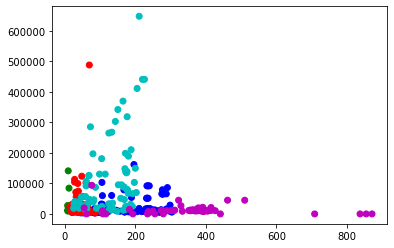

In [72]:
plt.scatter(df_px_added_cols_3_4['sum_of_eta'], df_px_added_cols_3_4['sum_of_eta_PX1000'], 
            c=df_px_added_cols_3_4['date'].map(
                dict(zip(df_px_added_cols_3_4['date'].unique(), ['b', 'g', 'r', 'c', 'm', 'y']))))

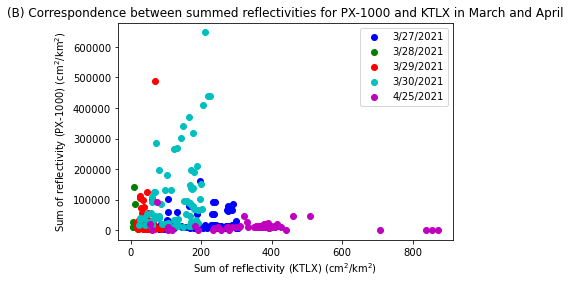

In [73]:
fig, ax = plt.subplots()

dates = ['3/27/2021', '3/28/2021', '3/29/2021', '3/30/2021', '4/25/2021']

colors = ['b', 'g', 'r', 'c', 'm']

for i in range(len(dates)):
    
    df_subset = df_px_added_cols_3_4[df_px_added_cols_3_4['date'] == df_px_added_cols_3_4['date'].unique()[i]]

    ax.scatter(df_subset['sum_of_eta'], df_subset['sum_of_eta_PX1000'], c=colors[i], label=dates[i])

ax.legend()

plt.xlabel('Sum of reflectivity (KTLX) ($\mathrm{cm^2}$/$\mathrm{km^2}$)')

plt.ylabel('Sum of reflectivity (PX-1000) ($\mathrm{cm^2}$/$\mathrm{km^2}$)')

plt.title('(B) Correspondence between summed reflectivities for PX-1000 and KTLX in March and April')

plt.show()

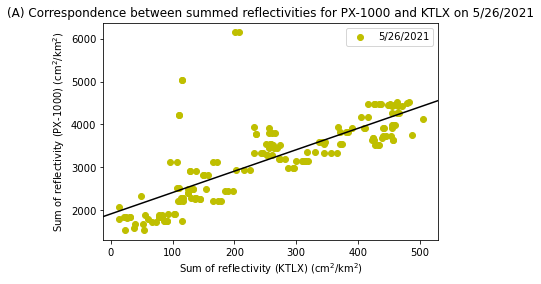

In [74]:
fig, ax = plt.subplots()

ax.scatter(df_px_added_cols_5['sum_of_eta'], df_px_added_cols_5['sum_of_eta_PX1000'], 
            c='y', label='5/26/2021')

ax.legend()

model_ols = smf.ols(formula='sum_of_eta_PX1000 ~ sum_of_eta', data=df_px_added_cols_5)

res_ols = model_ols.fit()

abline_plot(model_results=res_ols, color='black', ax=ax)

plt.xlabel('Sum of reflectivity (KTLX) ($\mathrm{cm^2}$/$\mathrm{km^2}$)')

plt.ylabel('Sum of reflectivity (PX-1000) ($\mathrm{cm^2}$/$\mathrm{km^2}$)')

plt.title('(A) Correspondence between summed reflectivities for PX-1000 and KTLX on 5/26/2021')

plt.show()

In [75]:
scipy.stats.pearsonr(df_px_added_cols_5['sum_of_eta'], df_px_added_cols_5['sum_of_eta_PX1000'])

(0.7684400151176278, 2.140908421579722e-34)

In [76]:
df_px_added_cols_20210327 = df_px_added_cols[df_px_added_cols['date'] == '20210327']
print(df_px_added_cols_20210327.shape)

df_px_added_cols_20210327.head(2)

(88, 20)


date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210327  000458   96.245742         5.103788            181.45099      0   
1  20210327  001434  102.304289         5.103788            181.45099      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        4       58           0.066667           0.016111        0.082778   
1       14       34           0.233333           0.009444        0.242778   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       13000.272258             0               0   
1      001000        4830.505495             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         0.082778  
1               0.166667         0.076111

In [77]:
df_px_added_cols_20210328 = df_px_added_cols[df_px_added_cols['date'] == '20210328']
print(df_px_added_cols_20210328.shape)

df_px_added_cols_20210328.head(2)

(9, 20)


date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
63  20210328  103454    7.838100          2.57985           209.742172     10   
64  20210328  104430    9.220916          2.57985           209.742172     10   

    minutes  seconds  minutes_converted  seconds_converted  time_converted  \
63       34       54           0.566667           0.015000       10.581667   
64       44       30           0.733333           0.008333       10.741667   

   time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
63      103000       11594.546905            10              30   
64      104000      141115.645344            10              40   

    seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
63               0                  0.500000                       0.0   
64               0                  0.666667                       0.0   

    time_converted_PX1000  time_difference  
63              10.500000         0.081667  
64              10.666667         0.075000

In [78]:
df_px_added_cols_20210329 = df_px_added_cols[df_px_added_cols['date'] == '20210329']
print(df_px_added_cols_20210329.shape)

df_px_added_cols_20210329.head(2)

(75, 20)


date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210329  000251   54.761941         1.637692            35.943175      0   
1  20210329  001226   86.172359         1.637692            35.943175      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        2       51           0.033333           0.014167        0.047500   
1       12       26           0.200000           0.007222        0.207222   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      000000       22684.455195             0               0   
1      001000        2973.302025             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                  0.000000                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
0               0.000000         0.047500  
1               0.166667         0.040556

In [79]:
df_px_added_cols_20210330 = df_px_added_cols[df_px_added_cols['date'] == '20210330']
print(df_px_added_cols_20210330.shape)

df_px_added_cols_20210330.head(2)

(75, 20)


date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
1  20210330  000514   67.558074         6.325282             7.982284      0   
1  20210330  001449   68.389471         6.325282             7.982284      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
1        5       14           0.083333           0.003889        0.087222   
1       14       49           0.233333           0.013611        0.246944   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
1      001000      125606.488203             0              10   
1      001000      125606.488203             0              10   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
1               0                  0.166667                       0.0   
1               0                  0.166667                       0.0   

   time_converted_PX1000  time_difference  
1               0.166667         0.079444  
1               0.166667         0.080278

In [80]:
df_px_added_cols_20210425 = df_px_added_cols[df_px_added_cols['date'] == '20210425']
print(df_px_added_cols_20210425.shape)

df_px_added_cols_20210425.head(2)

(75, 20)


date    time  sum_of_eta  mean_wind_speed  mean_wind_direction  hours  \
0  20210425  000516  871.116914         0.244471           229.433563      0   
0  20210425  001451  837.100157         0.244471           229.433563      0   

   minutes  seconds  minutes_converted  seconds_converted  time_converted  \
0        5       16           0.083333           0.004444        0.087778   
0       14       51           0.233333           0.014167        0.247500   

  time_PX1000  sum_of_eta_PX1000  hours_PX1000  minutes_PX1000  \
0      010000                0.0             1               0   
0      010000                0.0             1               0   

   seconds_PX1000  minutes_converted_PX1000  seconds_converted_PX1000  \
0               0                       0.0                       0.0   
0               0                       0.0                       0.0   

   time_converted_PX1000  time_difference  
0                    1.0         0.912222  
0                    1.0         0.752500

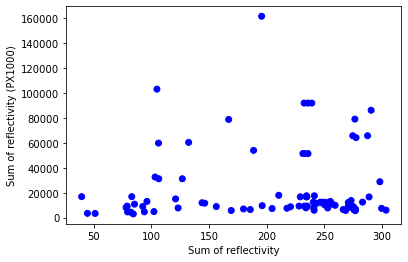

In [81]:
plt.scatter(df_px_added_cols_20210327['sum_of_eta'], df_px_added_cols_20210327['sum_of_eta_PX1000'], 
            c=df_px_added_cols_20210327['date'].map(
                dict(zip(df_px_added_cols_20210327['date'].unique(), ['b']))))

plt.xlabel('Sum of reflectivity')

plt.ylabel('Sum of reflectivity (PX1000)')

plt.show()

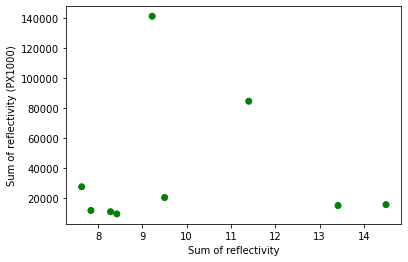

In [82]:
plt.scatter(df_px_added_cols_20210328['sum_of_eta'], df_px_added_cols_20210328['sum_of_eta_PX1000'], 
            c=df_px_added_cols_20210328['date'].map(
                dict(zip(df_px_added_cols_20210328['date'].unique(), ['g']))))

plt.xlabel('Sum of reflectivity')

plt.ylabel('Sum of reflectivity (PX1000)')

plt.show()

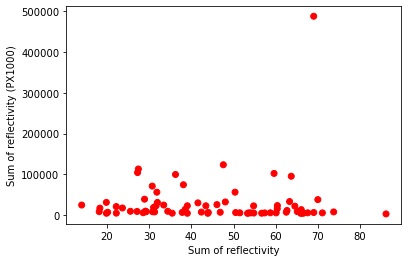

In [83]:
plt.scatter(df_px_added_cols_20210329['sum_of_eta'], df_px_added_cols_20210329['sum_of_eta_PX1000'], 
            c=df_px_added_cols_20210329['date'].map(
                dict(zip(df_px_added_cols_20210329['date'].unique(), ['r']))))

plt.xlabel('Sum of reflectivity')

plt.ylabel('Sum of reflectivity (PX1000)')

plt.show()

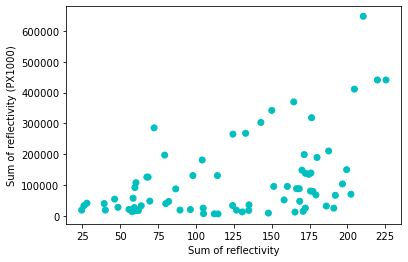

In [84]:
plt.scatter(df_px_added_cols_20210330['sum_of_eta'], df_px_added_cols_20210330['sum_of_eta_PX1000'], 
            c=df_px_added_cols_20210330['date'].map(
                dict(zip(df_px_added_cols_20210330['date'].unique(), ['c']))))

plt.xlabel('Sum of reflectivity')

plt.ylabel('Sum of reflectivity (PX1000)')

plt.show()

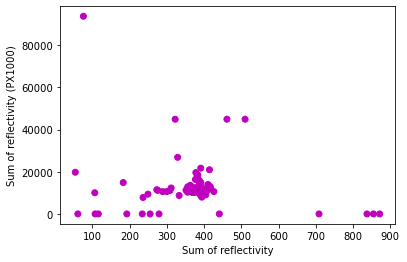

In [85]:
plt.scatter(df_px_added_cols_20210425['sum_of_eta'], df_px_added_cols_20210425['sum_of_eta_PX1000'], 
            c=df_px_added_cols_20210425['date'].map(
                dict(zip(df_px_added_cols_20210425['date'].unique(), ['m']))))

plt.xlabel('Sum of reflectivity')

plt.ylabel('Sum of reflectivity (PX1000)')

plt.show()